# Apartments ads analysis

At your disposal is the data of an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to the market value of real estate is determined. Your job is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and lake.

## Examining data from a file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
def iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return(q1,q3,iqr)

In [3]:
df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Results

1. The names of all variables are normal, with the possible exception of (cityCenters_nearest) - remove the capital letter

2. There are data gaps for most indicators

2.1 ceiling_height, floors_total - most likely just not specified, since they are unimportant indicators for the advertisment?

2.2 living_area/kitchen_area - perhaps an important indicator, need to check the availability of other areas for calculation

2.3 is_apartment - they can just pass in flats that are appartments by default

2.4 balcony - no data because it was not filled in, or flat doesn't have balcony?

2.5 locality_name - it is not yet clear how to fill the missing values, but the gaps are very few

2.6 data on the park / center, etc. - maybe so far that it makes no sense to measure? how much do they intersect? Maybe there were no coordinates for the automatic 
calculation?

2.7 days_exposition - very important for sales analytics, it's not clear how to calculate it missing values

3. is_apartment - object type, should be bool

4. Descriptive statistics:
4.1 No negative values ​​for indicators
4.2 strong spread of flats area (12-900)
4.3 we have flats with 0 number of rooms?
4.4 ceiling height strange values ​​(1 m, 100 m)
4.5 minimum area values ​​are a bit too small
4.6 0 - distance to the airport?

## Data preprocessing

In [8]:
df.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace=True)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Processing of city names (locality_name)

1. Unfilled values
2. Official names and simplified names of cities
3. Letter ё and е used interchangebly

In [9]:
cities = pd.DataFrame()
cities['locality_name'] = df['locality_name'].unique()

In [10]:
cities['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [11]:
cities['locality_name_imp'] = cities['locality_name'].str.replace('ё', 'е') \
    .str.replace('поселок ', '') \
    .str.replace('городской ', '') \
    .str.replace('городского типа ', '') \
    .str.replace('садовое товарищество ', '') \
    .str.replace('деревня ', '') \
    .str.replace('село ', '') \
    .str.replace('имени ', '') \
    .str.replace('станции ', '') \
    .str.replace('станции ', '') \
    .str.replace('садоводческое некоммерческое товарищество ', '') \
    .str.replace('коттеджный ', '') \
    .str.replace('при железнодорожной ', '')

In [12]:
for column in cities.columns:
    print(len(cities[column].unique()))

365
306


In [13]:
cities['locality_name_imp'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [14]:
df = df.merge(cities, on='locality_name') 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [16]:
df.query('locality_name_imp.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_imp
22521,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,NaN
22522,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN
22523,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,NaN
22524,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,NaN
22525,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,...,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,NaN
22526,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,NaN
22527,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,NaN
22528,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,...,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,NaN
22529,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,NaN
22530,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,...,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,NaN


In [17]:
df['locality_name_imp'] =  df['locality_name_imp'].fillna('unknown')

<b>Result</b>

Different official oparts of the name were excluded. As a result, 59 repetitions were eliminated.
There is still no good justification for how to fill in the blanks, but since there are very few of them - they are replaced by unknown

### Ceiling (ceiling height)

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

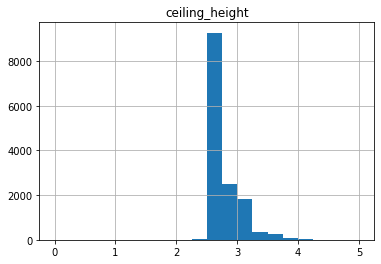

In [18]:
df.hist('ceiling_height', bins=20, range=(0, 5))

array([<AxesSubplot:title={'center':'ceiling_height'}>], dtype=object)

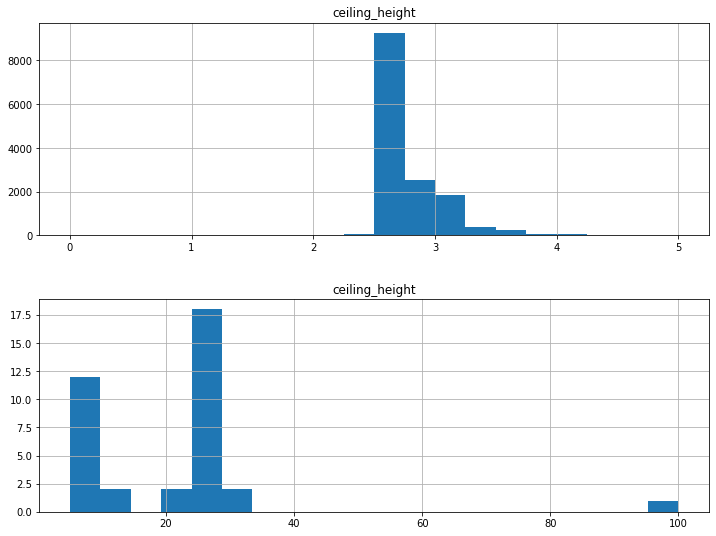

In [19]:
fig, ax = plt.subplots(2, facecolor='white', figsize=(12,9))

df.hist('ceiling_height', bins=20, range=(0, 5), ax = ax[0])
df.hist('ceiling_height', bins=20, range=(5, 100), ax=ax[1])

In [20]:
print(df.query('ceiling_height <= 4')['total_images'].count())
print(df.query('ceiling_height > 4')['total_images'].count())
print(df.query('ceiling_height > 5')['locality_name_imp'].value_counts())

14429
75
Санкт-Петербург    24
Мурино              2
Гатчина             1
Кронштадт           1
Волхов              1
Красное Село        1
Новый Свет          1
Луга                1
Нурма               1
Большая Ижора       1
Мины                1
Нижняя              1
Name: locality_name_imp, dtype: int64


Apartments with a ceiling height of 4-5 m do exist in this cities (https://realty.yandex.ru/offer/5792862551121513089/
https://realty.yandex.ru/offer/5792862551121581289/)

<AxesSubplot:>

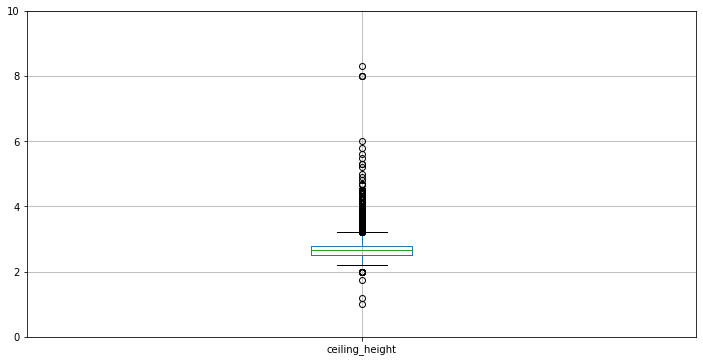

In [21]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

plt.ylim(0, 10)
df.boxplot(column=['ceiling_height'], ax=ax)

In [22]:
u = iqr(df['ceiling_height'])
print(u)

(2.52, 2.8, 0.2799999999999998)


In [23]:
print(df.query('ceiling_height <= @u[0] and ceiling_height > @u[0] - 1.5 * @u[2]')['total_images'].count())

3687


In [24]:
df.query('ceiling_height < @u[0] - 1.5 * @u[2]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_imp
344,11,2999000.0,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,NaN,...,NaN,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0,Санкт-Петербург
10910,6,12300000.0,88.30,2019-03-12T00:00:00,3,2.00,5.0,63.9,2,NaN,...,NaN,Санкт-Петербург,38415.0,7675.0,1.0,568.0,1.0,154.0,NaN,Санкт-Петербург
11259,5,4100000.0,40.00,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,Санкт-Петербург
15004,16,6000000.0,55.00,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0,Санкт-Петербург
19163,0,1500000.0,33.00,2018-10-03T00:00:00,1,2.00,5.0,20.0,5,False,...,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Выборг
19185,7,2700000.0,56.00,2018-02-04T00:00:00,3,2.00,5.0,46.0,1,NaN,...,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0,Выборг
19589,4,3300000.0,36.00,2017-06-18T00:00:00,1,2.00,17.0,15.2,12,NaN,...,0.0,посёлок Металлострой,25268.0,26980.0,0.0,NaN,0.0,NaN,53.0,Металлострой
20097,17,2300000.0,53.60,2018-10-18T00:00:00,2,2.00,2.0,19.0,1,NaN,...,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Всеволожск
21369,5,1700000.0,40.00,2018-07-15T00:00:00,2,2.00,9.0,NaN,8,NaN,...,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Сосновый Бор
21558,9,3600000.0,38.00,2018-07-05T00:00:00,1,2.00,12.0,15.0,9,NaN,...,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,62.0,Кудрово


In [25]:
df.loc[df['ceiling_height'] < u[0] - 1.5 * u[2], 'ceiling_height'] = u[0] - 1.5 * u[2]

In [26]:
df.query('ceiling_height < @u[0] - 1.5 * @u[2]')['total_images'].count()

0

In [27]:
df.loc[df['ceiling_height'] > 5, 'ceiling_height'] = 5

In [28]:
df.query('ceiling_height > 5')['total_images'].count()

0

In [29]:
df.query('ceiling_height.isna()')['locality_name_imp'].value_counts().head(15)

Санкт-Петербург    5617
Мурино              362
Кудрово             277
Шушары              223
Парголово           190
Гатчина             158
Выборг              139
Колпино             135
Пушкин              135
Всеволожск          126
Кингисепп            76
Бугры                71
Красное Село         66
Сланцы               63
Петергоф             56
Name: locality_name_imp, dtype: int64

In [30]:
u = df.pivot_table(values='ceiling_height', index='locality_name_imp', aggfunc=['median', 'count'])
u.columns=('median', 'count')
print(u.sort_values(by='count', ascending=False).head(15))

                   median  count
locality_name_imp               
Санкт-Петербург      2.70  10104
Всеволожск           2.70    272
Пушкин               2.60    234
Мурино               2.70    228
Шушары               2.63    217
Колпино              2.50    203
Кудрово              2.75    195
Гатчина              2.55    149
Петергоф             2.55    145
Парголово            2.64    137
Сестрорецк           2.70    129
Красное Село         2.60    112
Сертолово            2.60    101
Выборг               2.55     98
Новое Девяткино      2.70     97


In [31]:
for city in df['locality_name_imp'].unique():
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name_imp'] == city), 'ceiling_height'] = u.loc[city, 'median']

In [32]:
df.query('ceiling_height.isna()')['locality_name_imp'].value_counts().head(15)

Кобринское         6
Селезнево          5
Усть-Луга          5
Старополье         3
Рождествено        3
Аро                3
Торошковичи        3
Заклинье           3
Свирь              2
Ям-Тесово          2
Выскатка           2
Старая Ладога      2
Усть-Ижора         2
Вознесенье         2
Старые Бегуницы    2
Name: locality_name_imp, dtype: int64

In [33]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

array([<AxesSubplot:title={'center':'ceiling_height'}>], dtype=object)

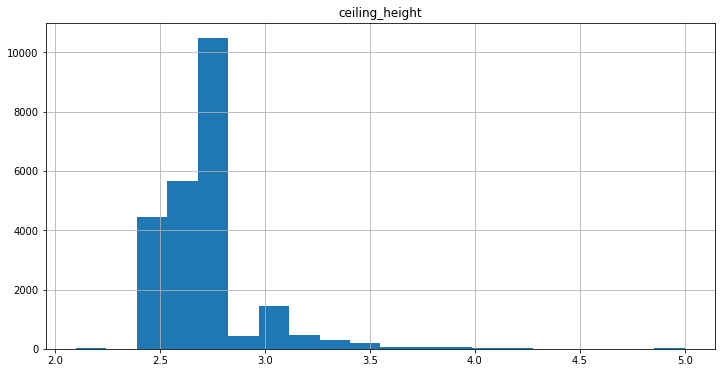

In [34]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.hist('ceiling_height', bins=20, ax=ax)

<b>Result</b>

The data is cleared. Outliers with very small ceilings were raised to the minimum value of %Q1-1.5IQR%

High ceilings - were reduced to a maximum height of 5, since such offers (ceilings of 4-5 m) actually exist on the market

Missing values are filled with the median for the city, if there was no median for the city - the median for the entire sample.

### Total floors (floors_total)

array([<AxesSubplot:title={'center':'floors_total'}>], dtype=object)

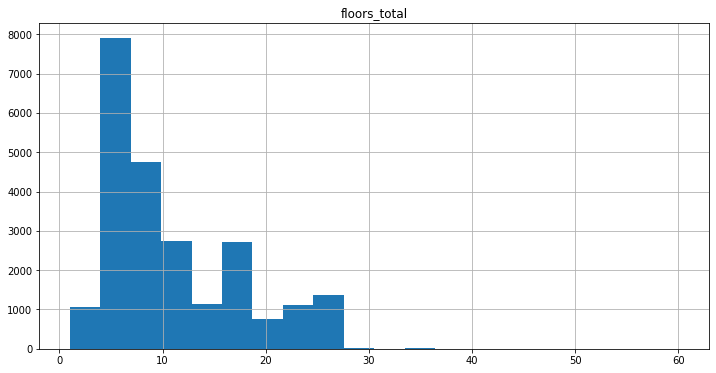

In [35]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.hist('floors_total', bins=20, ax=ax)

In [36]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [37]:
df.query('floors_total > 50')['locality_name_imp'].value_counts().head(15)

Санкт-Петербург    1
Кронштадт          1
Name: locality_name_imp, dtype: int64

In [38]:
df.query('floors_total.isna()')['locality_name_imp'].value_counts().head(15)

Санкт-Петербург    70
Мурино              4
Красное Село        2
Кудрово             2
Шушары              1
Новое Девяткино     1
Бугры               1
Стрельна            1
unknown             1
Новоселье           1
Щеглово             1
Токсово             1
Name: locality_name_imp, dtype: int64

In [39]:
u = df.pivot_table(values='floors_total', index='locality_name_imp', aggfunc=['median', 'count'])
u.columns=('median', 'count')
print(u.sort_values(by='count', ascending=False).head(15))

                   median  count
locality_name_imp               
Санкт-Петербург       9.0  15651
Мурино               19.0    586
Кудрово              18.0    470
Шушары                9.0    439
Всеволожск            9.0    398
Пушкин                5.0    369
Колпино               9.0    338
Парголово            25.0    327
Гатчина               5.0    307
Выборг                5.0    237
Петергоф              5.0    201
Сестрорецк            5.0    183
Красное Село          6.0    176
Новое Девяткино      16.0    143
Сертолово             9.0    142


array([<AxesSubplot:title={'center':'floors_total'}>], dtype=object)

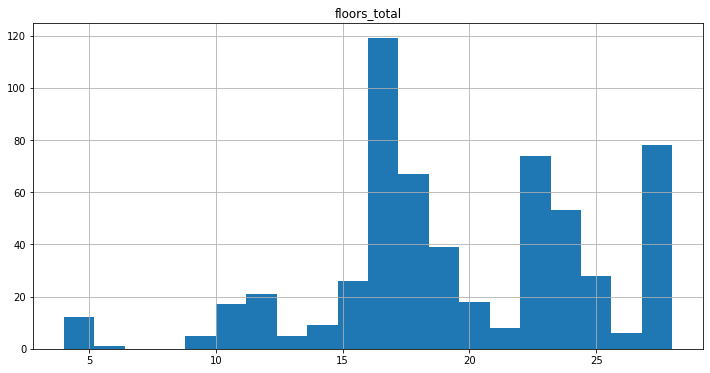

In [40]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.query('locality_name_imp == "Мурино"').hist('floors_total', bins=20, ax=ax)

array([<AxesSubplot:title={'center':'floors_total'}>], dtype=object)

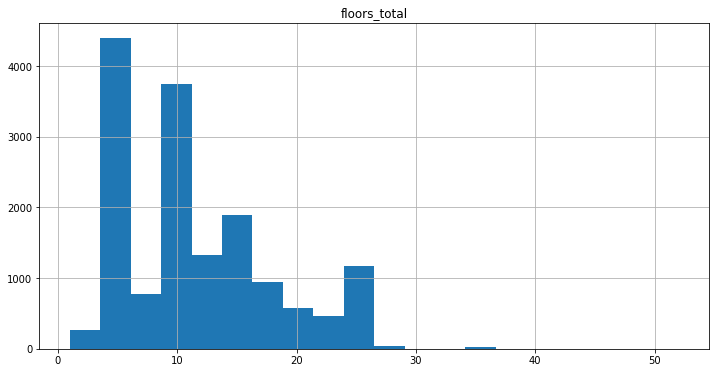

In [41]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.query('locality_name_imp == "Санкт-Петербург"').hist('floors_total', bins=20, ax=ax)

In [42]:
df.query('floors_total.isna()')['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
21     4
7      4
3      4
5      4
10     3
11     3
19     3
13     3
1      3
18     3
15     3
24     2
2      2
20     2
14     2
23     1
22     1
17     1
Name: floor, dtype: int64

In [43]:
u = df.pivot_table(values='floors_total', index='floor', aggfunc=['median', 'count'])
u.columns=('median', 'count')
print(u.sort_values(by='floor', ascending=True).head(30))

       median  count
floor               
1         5.0   2914
2         5.0   3366
3         5.0   3069
4         5.0   2794
5         6.0   2617
6         9.0   1296
7        10.0   1214
8        10.0   1075
9        10.0   1046
10       16.0    684
11       16.0    520
12       16.0    520
13       17.0    376
14       17.0    335
15       17.0    340
16       18.0    315
17       22.0    226
18       22.0    175
19       24.0    144
20       24.0    108
21       25.0    121
22       25.0    112
23       25.0     99
24       25.0     61
25       25.0     46
26       27.0     24
27       27.0     10
28       36.0      1
29       36.0      1
30       35.0      1


In [44]:
df['flor'] = df['floor']

In [45]:
df.query('flor == 1')['floors_total'].value_counts()

5.0     1102
9.0      467
4.0      226
3.0      217
2.0      192
10.0     126
6.0      115
12.0      99
16.0      62
7.0       60
17.0      33
8.0       30
25.0      27
1.0       25
14.0      24
15.0      21
18.0      20
22.0      10
11.0      10
24.0       9
19.0       8
13.0       8
20.0       7
23.0       5
27.0       5
26.0       3
21.0       3
Name: floors_total, dtype: int64

In [46]:
df=df.drop('flor', axis=1)

In [47]:
for f in df['floor'].unique():
    df.loc[(df['floors_total'].isna()) & (df['floor'] == f), 'floors_total'] = u.loc[f, 'median']

In [48]:
df.query('floors_total.isna()')['floor'].value_counts()

Series([], Name: floor, dtype: int64)

<b>Result</b>

There may be errors in the selection (a strange building with 60 floors in Kronstadt the city that doesn't have such high buildings)

Filling the missing floors using the city average is not perfect - the houses are different and the average level will not help much. Plus, there may be risks when the height of the entire building is less than the floor of the object.

Since information about the floor of the object was available for all records that miss floor_total, it was decided to use it - to determine the median floor level of the houses where the apartments are displayed.

### living_area and kitchen_area

In [49]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
locality_name_imp           0
dtype: int64

array([<AxesSubplot:title={'center':'living_area'}>], dtype=object)

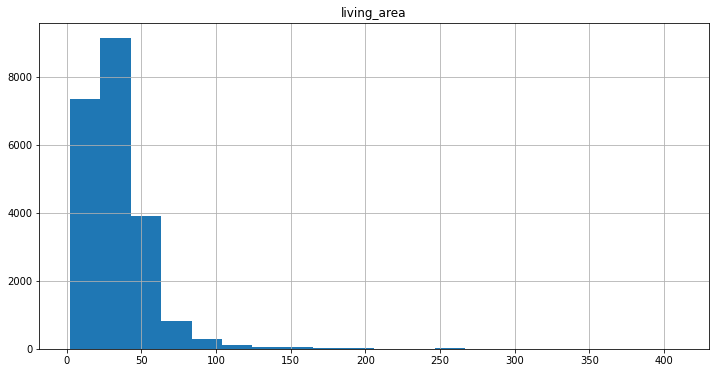

In [50]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.hist('living_area', bins=20, ax=ax)

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

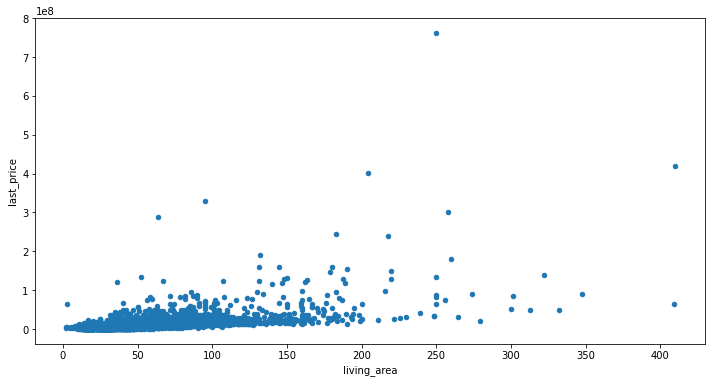

In [51]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.plot.scatter(x='living_area', y='last_price', ax=ax)

In [52]:
df['other_area'] = df['total_area'] - df['living_area'] - df['kitchen_area']

In [53]:
df['other_area'].describe()

count    20982.000000
mean        15.385936
std         12.171863
min        -29.800000
25%          9.402500
50%         12.700000
75%         17.800000
max        378.300000
Name: other_area, dtype: float64

In [54]:
df.query('other_area < 0')[['total_area', 'kitchen_area', 'living_area', 'other_area']].median()

total_area      42.5
kitchen_area    12.0
living_area     36.9
other_area      -5.0
dtype: float64

In [55]:
df.query('other_area > 0')[['total_area', 'kitchen_area', 'living_area', 'other_area']].median()

total_area      52.3
kitchen_area     9.0
living_area     30.0
other_area      12.7
dtype: float64

In [56]:
x = df.query('other_area < 0')[['total_area', 'kitchen_area', 'living_area', 'other_area']].head(15)
x['share_k'] = x['kitchen_area'] / x['total_area']
x['share_l'] = x['living_area'] / x['total_area']
print(x['share_k'].median())
print(x['share_l'].median())

0.3076923076923077
0.8642384105960266


In [57]:
x = df.query('other_area > 0')[['total_area', 'kitchen_area', 'living_area', 'other_area']].head(15)
x['share_k'] = x['kitchen_area'] / x['total_area']
x['share_l'] = x['living_area'] / x['total_area']
print(x['share_k'].median())
print(x['share_l'].median())
share_k_l = x['share_k'].median() + x['share_l'].median()
share_l = x['share_l'].median()
share_k = x['share_k'].median()

0.190625
0.5348101265822784


In [58]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * share_l) 

In [59]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * share_k) 

In [60]:
df['other_area'] = df['total_area'] - df['living_area'] - df['kitchen_area']

In [61]:
df.loc[df['other_area'] < 0, 'total_area'] = (df['living_area'] + df['kitchen_area']) / share_k_l

In [62]:
df['other_area'] = df['total_area'] - df['living_area'] - df['kitchen_area']

In [63]:
df.query('other_area < 0')['rooms'].value_counts()

Series([], Name: rooms, dtype: int64)

In [64]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
locality_name_imp           0
other_area                  0
dtype: int64

<AxesSubplot:title={'center':'other_area'}, xlabel='[rooms]'>

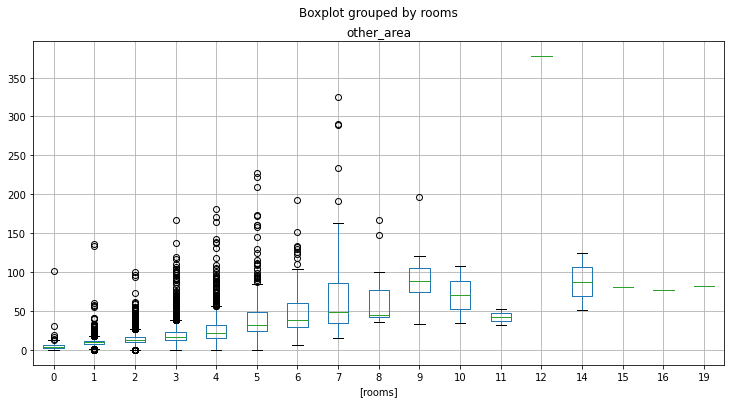

In [65]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.boxplot(column=['other_area'], by=['rooms'], ax=ax)

<b>Result</b>

1. To fill in missing values for kithchen and living area we used the median share of them in the total area
2. We have the following problem with area - the sum of kitchen and living area could be more that the total area of the flat. In this case the total area was increased to correct this mistake
3. There are strange outliers in data areas>400 square meters, for example. But for now we will not do anything with them

### is_apartment

In [66]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [67]:
u = df.pivot_table(values=('floors_total', 'total_area', 'studio', 'balcony'), index='is_apartment', aggfunc=['median','mean'])
u

median                                     mean               \
             balcony floors_total studio total_area   balcony floors_total   
is_apartment                                                                 
False            1.0          9.0    0.0       54.0  1.207322    10.737248   
True             2.0          5.0    0.0       64.0  2.064516     6.900000   

                                   
                studio total_area  
is_apartment                       
False         0.005505  61.362397  
True          0.000000  85.189645

In [68]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<b>Result</b>

The column is almost never filled.

This is most likely due to the fact that almost all of the filled ones are not recognized as apartments (98.2%). Apartments are practically not included in the selection and basically the housing market is ordinary flats

1. It is not possible to find a quick way to distinguish apartments from apartments using other indicators
2. The hypothesis that the seller will most often note such a feature of the real estate being sold, as the fact that they are considered apartments (although they may want to hide this information(?). Therefore, failure to fill in this information by the seller is rather an indicator that the property being sold is not an apartment.
As a result, empty values ​​are filled with False

### balcony

<b>Hypotheses </b>
1. People do not specify balconies if there are none
2. The floor can be a predictor of the number of balconies
3. Can we use the difference in areas to try and estimate the presence of balconies? Total - living - kitchen
4. The number of balconies whould not greater than the number of rooms?

In [70]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [71]:
print(df.query('balcony < rooms')['rooms'].count())
print(df.query('balcony == rooms')['rooms'].count())
print(df.query('balcony > rooms')['rooms'].count())
print(df.query('balcony <= rooms')['rooms'].count() / df['balcony'].count() )

7405
2697
2078
0.8293924466338259


In [72]:
df['balcony'].isna().sum()

11519

In [73]:
u = df.pivot_table(values=('other_area', 'total_area', 'living_area'), index='balcony', aggfunc=['median','mean','count'])
u

median                              mean                        \
        living_area other_area total_area living_area other_area total_area   
balcony                                                                       
0.0            30.3       12.6       52.5   35.709033  15.726547  61.976965   
1.0            29.2       12.0       48.9   32.974115  14.423748  57.276207   
2.0            29.0       13.3       52.0   30.577761  14.863739  56.192412   
3.0            45.0       20.0       75.0   51.465827  24.597188  89.448189   
4.0            43.6       18.0       75.0   46.699529  21.051528  81.426230   
5.0            42.3       19.0       71.8   45.334863  22.784580  81.070011   

              count                        
        living_area other_area total_area  
balcony                                    
0.0            3758       3758       3758  
1.0            4195       4195       4195  
2.0            3659       3659       3659  
3.0              81         81         81  
4.0             183        183        183  
5.0             304        304        304

<ipython-input-74-a8bfb3d40207>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df[['balcony', 'floor']], alpha=0.2, ax=ax)


array([[<AxesSubplot:xlabel='balcony', ylabel='balcony'>,
        <AxesSubplot:xlabel='floor', ylabel='balcony'>],
       [<AxesSubplot:xlabel='balcony', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>]], dtype=object)

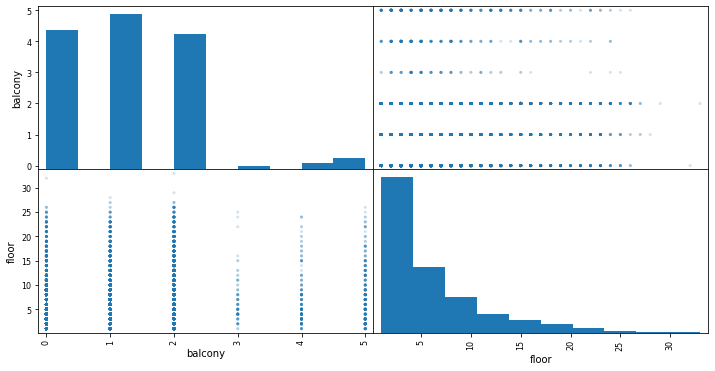

In [74]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

pd.plotting.scatter_matrix(df[['balcony', 'floor']], alpha=0.2, ax=ax)

In [75]:
x = pd.DataFrame()
x['floor1'] = df[df['floor'] == 1]['balcony'].value_counts()

In [76]:
x['bal'] = df['balcony'].value_counts()

In [77]:
x['share'] = x['floor1']/x['bal']*100

In [78]:
x

,floor1,bal,share
0.0,604,3758,16.072379
2.0,232,3659,6.340530
1.0,131,4195,3.122765
5.0,15,304,4.934211
4.0,7,183,3.825137
3.0,2,81,2.469136


On the first floor there is a greater chance for appartment to not have balcony

In [79]:
floor_balc = pd.DataFrame()
for y in df['floor'].unique():
    x = pd.DataFrame()
    x['floor'] = df[df["floor"] == y]['balcony'].value_counts()
    x['bal'] = df['balcony'].value_counts()
    x['share'] = x['floor']/x['bal'] *100
    floor_balc['share_', y] = x['share']

In [80]:
floor_balc = floor_balc.T
print(floor_balc.sort_index(ascending=True))


                   2.0        1.0        0.0        5.0        4.0        3.0
(share_, 1)   6.340530   3.122765  16.072379   4.934211   3.825137   2.469136
(share_, 2)   8.882208  14.421931  15.886110  12.171053   9.836066   8.641975
(share_, 3)   9.975403  14.922527  13.304949  10.526316  15.300546   7.407407
(share_, 4)   9.620115  14.159714  11.814795   5.263158  14.207650  19.753086
(share_, 5)   9.346816  13.563766  10.936668   9.539474  11.475410  13.580247
(share_, 6)   7.324406   5.625745   4.576903   6.250000   5.464481   8.641975
(share_, 7)   6.586499   5.768772   5.002661   7.565789   4.918033   8.641975
(share_, 8)   6.067231   5.148987   3.512507   6.907895   8.196721   7.407407
(share_, 9)   6.449850   5.077473   4.390633   4.934211   3.825137   3.703704
(share_, 10)  4.564089   3.241955   2.235232   3.618421   2.732240   2.469136
(share_, 11)  3.880842   2.097735   1.623204   2.631579   2.185792   4.938272
(share_, 12)  3.416234   2.312277   2.022352   4.605263   2.7322

60% of flats on the 1 floor don't have a balcony

2 floor - 37% have 0 balcony, 38% - 1

3-5 floors - ususally 1 balcony

the higher we go the more likely there is at least 2 balconies in the appartment


In [81]:
floor_balc_prob = pd.DataFrame()
for y in df['floor'].unique():
    x = pd.DataFrame()
    x['floor'] = df[df["floor"] == y]['balcony'].value_counts()
    x['sum_balc'] = df[df["floor"] == y]['balcony'].count()    
    x['share'] = x['floor']/x['sum_balc'] * 100
    floor_balc_prob['share_', y] = x['share']

In [82]:
floor_balc_prob = floor_balc_prob.T
print(floor_balc_prob.sort_index(ascending=True))

                     2.0         1.0         0.0       5.0       4.0       3.0
(share_, 1)    23.410696   13.218971   60.948537  1.513623  0.706357  0.201816
(share_, 2)    20.453115   38.074261   37.570799  2.328508  1.132788  0.440529
(share_, 3)    23.442518   40.205523   32.113038  2.055234  1.798330  0.385356
(share_, 4)    24.309392   41.022099   30.662983  1.104972  1.795580  1.104972
(share_, 5)    24.728850   41.142444   29.718004  2.096891  1.518438  0.795372
(share_, 6)    37.640449   33.146067   24.157303  2.668539  1.404494  0.983146
(share_, 7)    33.943662   34.084507   26.478873  3.239437  1.267606  0.985915
(share_, 8)    36.274510   35.294118   21.568627  3.431373  2.450980  0.980392
(share_, 9)    36.932707   33.333333   25.821596  2.347418  1.095462  0.469484
(share_, 10)   41.234568   33.580247   20.740741  2.716049  1.234568  0.493827
(share_, 11)   46.254072   28.664495   19.869707  2.605863  1.302932  1.302932
(share_, 12)   39.184953   30.407524   23.824451  4.

<b>Hypotheses results</b>
1. People do not indicate balconies if there are none (It is possible, but unlikely, that more than half of the observed our flats do not have a balcony)
2. The floor can become a predictor of the number of balconies - there is a high probability of 0 balconies for 1 floor, etc.
3. Because of the difference in areas, is it possible to try to estimate the presence of balconies? Common-living-kitchen - there is a difference between 0-2 balconies and 3-5.
How to combine 2-3 together? Ideally, make a predictive function, but if for floors it is simple (since the data is categorical)

In [83]:
u = df.pivot_table(values=('other_area', 'total_area', 'living_area'), index='balcony', aggfunc=['median','mean','count'])
u

median                              mean                        \
        living_area other_area total_area living_area other_area total_area   
balcony                                                                       
0.0            30.3       12.6       52.5   35.709033  15.726547  61.976965   
1.0            29.2       12.0       48.9   32.974115  14.423748  57.276207   
2.0            29.0       13.3       52.0   30.577761  14.863739  56.192412   
3.0            45.0       20.0       75.0   51.465827  24.597188  89.448189   
4.0            43.6       18.0       75.0   46.699529  21.051528  81.426230   
5.0            42.3       19.0       71.8   45.334863  22.784580  81.070011   

              count                        
        living_area other_area total_area  
balcony                                    
0.0            3758       3758       3758  
1.0            4195       4195       4195  
2.0            3659       3659       3659  
3.0              81         81         81  
4.0             183        183        183  
5.0             304        304        304

In [84]:
df.query('balcony==5')['rooms'].value_counts()

3    166
2     83
1     25
4     23
5      5
7      2
Name: rooms, dtype: int64

In [85]:
floor_balc_prob40_19 = pd.DataFrame()
df['flor'] = df['floor']
for y in df['flor'].unique():
    x = pd.DataFrame()
    x['floor'] = df.query("flor == @y and living_area > 40 and other_area > 19")['balcony'].value_counts()
    x['sum_balc'] = df.query("flor == @y and living_area > 40 and other_area > 19")['balcony'].count()    
    x['share'] = x['floor']/x['sum_balc'] * 100
    floor_balc_prob40_19['share_', y] = x['share']
df=df.drop('flor', axis=1)

In [86]:
floor_balc_prob40_19 = floor_balc_prob40_19.T
print(floor_balc_prob40_19.sort_index(ascending=True))

                    1.0         0.0         2.0        5.0        4.0  \
(share_, 1)   15.053763   49.462366   25.806452   6.451613   3.225806   
(share_, 2)   20.175439   49.122807   21.929825   5.263158   2.192982   
(share_, 3)   32.340426   37.446809   20.425532   5.106383   2.978723   
(share_, 4)   37.037037   34.259259   20.833333   2.314815   3.240741   
(share_, 5)   25.274725   31.318681   29.670330   6.043956   6.043956   
(share_, 6)   30.578512   35.537190   28.099174   2.479339   1.652893   
(share_, 7)   29.906542   31.775701   23.364486   8.411215   3.738318   
(share_, 8)   32.978723   27.659574   22.340426   7.446809   6.382979   
(share_, 9)   29.487179   30.769231   30.769231   3.846154   3.846154   
(share_, 10)  25.806452   32.258065   27.419355   9.677419   3.225806   
(share_, 11)  36.585366    9.756098   34.146341   7.317073   4.878049   
(share_, 12)  25.000000   28.571429   26.785714  14.285714   3.571429   
(share_, 13)  40.540541   29.729730   13.513514  13

I took the medians by area from the beginning of this analysis (3+ balconies usually in apartments with 40m living space and 19 others) - it is clear that the probable number of balconies varies significantly

The option of preliminary assessment is offered as follows

1. We look at the floor of the apartment

2. We estimate the likely number of balconies on this floor in apartments with similar living and other areas (+- 20%)

3. Where probability is higher, we take the resulting number - if there are no appartemts similiar to the area of our recors - we simply take probability using the floor of the appartment 

4. We do it for the whole - we check the error for the appartments where we know the right answer

5. If it the error is small - then we use this prediction to fill missing data

In [87]:
x = pd.DataFrame()
x = df[['balcony', 'floor', 'living_area', 'other_area', 'rooms']]
x = x.dropna()
x['flor']=x['floor']
x.reset_index(drop=True)

,balcony,floor,living_area,other_area,rooms,flor
0,0.0,4,34.300000,13.400000,2,4
1,0.0,9,85.034810,43.655815,3,9
2,2.0,22,38.292405,14.407595,2,22
3,2.0,7,43.600000,10.900000,3,7
4,1.0,5,20.500000,10.900000,1,5
...,...,...,...,...,...,...
12175,0.0,1,15.000000,6.000000,1,1
12176,1.0,4,47.600000,11.600000,3,4
12177,2.0,2,57.400000,0.400000,3,2
12178,1.0,3,30.600000,10.300000,2,3


In [88]:
df['flor'] = df['floor']
for index, row in df.query('balcony.isna()').iterrows():
    y = row['living_area']
    y1 = row['other_area']
    t = x.query('living_area < 1.2 * @y and living_area > 0.8 * @y and other_area < 1.2 * @y1\
    and other_area > 0.8 * @y1')
    y = row['flor']
    x1 = pd.DataFrame()
    x1['flor'] = t.query("flor == @y")['balcony'].value_counts()
    x1['sum_balc'] = t.query("flor == @y")['balcony'].count()    
    x1['share'] = x1['flor']/x1['sum_balc'] * 100
    if x1['sum_balc'].sum() > 0:
        fin = x1['share'].idxmax()
    else:
        x1 = pd.DataFrame()
        x1['flor'] = df.query("flor == @y")['balcony'].value_counts()
        x1['sum_balc'] = df.query("flor == @y")['balcony'].count()
        x1['share'] = x1['flor']/x1['sum_balc'] * 100
        if x1['sum_balc'].sum() > 0:
            fin = x1['share'].idxmax()
        else:
            fin = 0
    df.at[index, 'balcony'] =  fin


In [89]:
df = df.drop('flor', axis = 1)

<b>Result</b>

It is determined that the number of balconies depends on the floor and the total area. The number of rooms also has an effect - it was not entirely justified that the number of rooms should be greater than or equal to the number of balconies - which is strange.

The first 2 factors are used for filling missing variables. We chacked this model on the available data to prove that predictions are close to the actual data.

Downside - the calculation is very long. Perhaps a separate function that would work with the entire column would be useful here

### information about parks/center/airport

In [90]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
locality_name_imp           0
other_area                  0
dtype: int64

In [91]:
df.query('parks_nearest.isna()')['parks_around3000'].value_counts()

0.0    10102
Name: parks_around3000, dtype: int64

In [92]:
df.query('parks_around3000.isna()')['parks_nearest'].value_counts()

Series([], Name: parks_nearest, dtype: int64)

In [93]:
df[['parks_nearest', 'parks_around3000']].describe()

,parks_nearest,parks_around3000
count,8079.000000,18181.000000
mean,490.804555,0.611408
std,342.317995,0.802074
min,1.000000,0.000000
25%,288.000000,0.000000
50%,455.000000,0.000000
75%,612.000000,1.000000
max,3190.000000,3.000000


In [94]:
df['parks_nearest'] = df['parks_nearest'].fillna(99999)
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [95]:
df[['parks_nearest', 'parks_around3000']].describe()

,parks_nearest,parks_around3000
count,23699.000000,23699.000000
mean,66076.610406,0.469049
std,47169.493154,0.748534
min,1.000000,0.000000
25%,601.000000,0.000000
50%,99999.000000,0.000000
75%,99999.000000,1.000000
max,99999.000000,3.000000


In [96]:
df.query('ponds_nearest.isna()')['ponds_around3000'].value_counts()

0.0    9071
Name: ponds_around3000, dtype: int64

In [97]:
df.query('ponds_around3000.isna()')['ponds_nearest'].value_counts()

Series([], Name: ponds_nearest, dtype: int64)

In [98]:
df[['ponds_nearest', 'ponds_around3000']].describe()

,ponds_nearest,ponds_around3000
count,9110.000000,18181.000000
mean,517.980900,0.770255
std,277.720643,0.938346
min,13.000000,0.000000
25%,294.000000,0.000000
50%,502.000000,1.000000
75%,729.000000,1.000000
max,1344.000000,3.000000


In [99]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(99999)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [100]:
df[['airports_nearest']].describe()

,airports_nearest
count,18157.000000
mean,28793.672193
std,12630.880622
min,0.000000
25%,18585.000000
50%,26726.000000
75%,37273.000000
max,84869.000000


In [101]:
for city in df['locality_name_imp'].unique():
    if df.query('locality_name_imp == @city')['airports_nearest'].count() > 0:
        df.loc[(df['airports_nearest'].isna()) & (df['locality_name_imp'] == city), 'airports_nearest'] = \
        df.query('locality_name_imp == @city')['airports_nearest'].max()
    else:
        df.loc[(df['airports_nearest'].isna()) & (df['locality_name_imp'] == city), 'airports_nearest'] = 999999

In [102]:
df[['city_centers_nearest']].describe()

,city_centers_nearest
count,18180.000000
mean,14191.277833
std,8608.386210
min,181.000000
25%,9238.000000
50%,13098.500000
75%,16293.000000
max,65968.000000


In [103]:
for city in df['locality_name_imp'].unique():
    if df.query('locality_name_imp == @city')['city_centers_nearest'].count() > 0:
        df.loc[(df['city_centers_nearest'].isna()) & (df['locality_name_imp'] == city), 'city_centers_nearest'] = \
        df.query('locality_name_imp == @city')['city_centers_nearest'].max()
    else:
        df.loc[(df['city_centers_nearest'].isna()) & (df['locality_name_imp'] == city), 'city_centers_nearest'] = 999999

<b>Result</b>

This columns are automatically calculated by coordinates, so the lack of data is not the fault of the user, but the limitation of the used method of calculating distance - the park/pond, etc. is too far
Two approaches were used to fill in the data
1. For parks and ponds. It was checked that there is no data within a radius of 3 km, for such situations the distance was set at 99999. 
2. For the center of the city and the airport - at the beginning, the median was used, but this is probably incorrect - the absence of data is most likely due to an even greater distance from these points. So I took the furthest observation we have in the sample for the same city to fill missing data. If there wer no data for spesific city - then the distance was set at 999999

### days_exposition

<b>Hypotheses </b>
1. High price - the longer it will be put on exposition
2. A high price per square meter - the longer it will be put on exposition

In [104]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_imp,other_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,32.000000
1,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,13.400000
2,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,85.034810,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,43.655815
3,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,27.000000
4,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.70,24.0,38.292405,22,False,...,Санкт-Петербург,23982.0,11634.0,0.0,99999.0,0.0,99999.0,NaN,Санкт-Петербург,14.407595


In [105]:
df["price_per_sq"] = df['last_price'] / df['total_area']

<ipython-input-106-dfcf03fa5831>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df[['price_per_sq', 'last_price', 'days_exposition', 'total_area']], alpha=0.2, ax=ax)


array([[<AxesSubplot:xlabel='price_per_sq', ylabel='price_per_sq'>,
        <AxesSubplot:xlabel='last_price', ylabel='price_per_sq'>,
        <AxesSubplot:xlabel='days_exposition', ylabel='price_per_sq'>,
        <AxesSubplot:xlabel='total_area', ylabel='price_per_sq'>],
       [<AxesSubplot:xlabel='price_per_sq', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='days_exposition', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='price_per_sq', ylabel='days_exposition'>,
        <AxesSubplot:xlabel='last_price', ylabel='days_exposition'>,
        <AxesSubplot:xlabel='days_exposition', ylabel='days_exposition'>,
        <AxesSubplot:xlabel='total_area', ylabel='days_exposition'>],
       [<AxesSubplot:xlabel='price_per_sq', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='days_exposition', yla

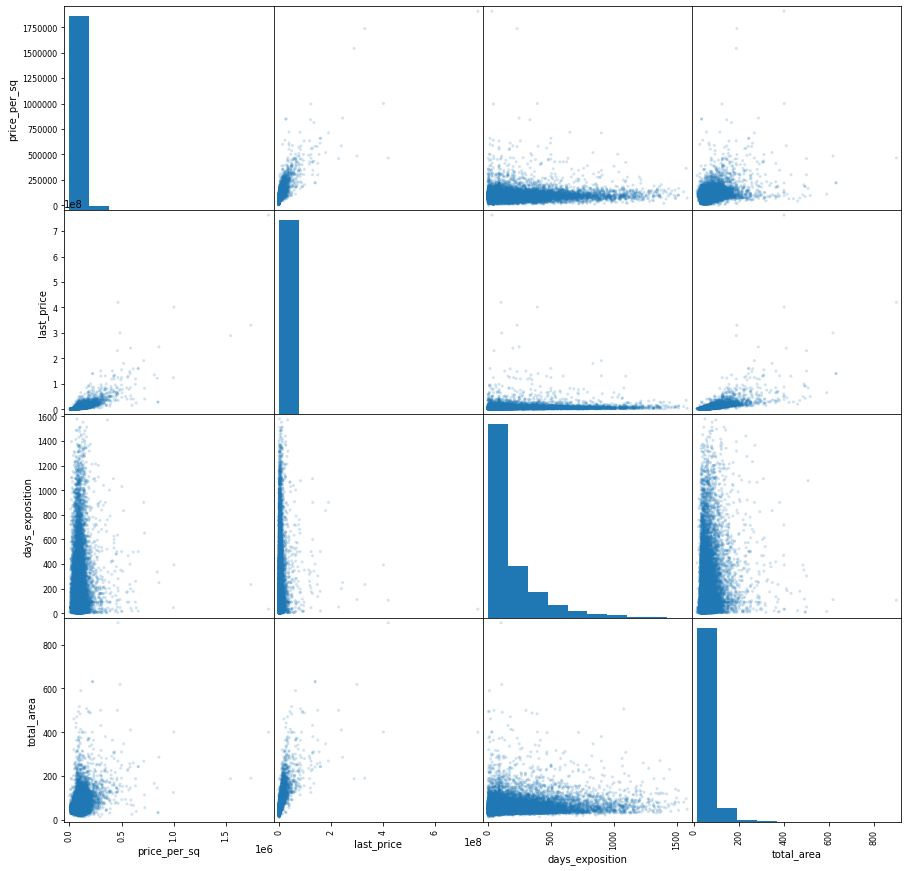

In [106]:
fig, ax = plt.subplots(facecolor='white', figsize=(15,15))

pd.plotting.scatter_matrix(df[['price_per_sq', 'last_price', 'days_exposition', 'total_area']], alpha=0.2, ax=ax)

In [107]:
print(df['days_exposition'].corr(df['last_price']))
print(df['days_exposition'].corr(df['price_per_sq']))
print(df['days_exposition'].corr(df['total_area']))

0.08114593098611304
0.04881959908897632
0.1490136991825722


In [108]:
for x in df:
    if df[x].dtype == 'int64' or df[x].dtype == 'float':
        print(x, df['days_exposition'].corr(df[x]))


total_images -0.02665671380037579
last_price 0.08114593098611304
total_area 0.1490136991825722
rooms 0.12696075769429646
ceiling_height 0.10241126205811882
floors_total -0.05250633437835176
living_area 0.14536482723305572
floor -0.03946308020560682
kitchen_area 0.11088655140859997
balcony -0.04310048014348314
airports_nearest -0.004206947417025137
city_centers_nearest -0.004621293192654448
parks_around3000 0.05586668472929206
parks_nearest -0.04376282107412698
ponds_around3000 0.06628938881990566
ponds_nearest -0.04894952398653298
days_exposition 1.0
other_area 0.11467243908703403
price_per_sq 0.04881959908897632


In [109]:
x = []
for city in df['locality_name_imp'].unique():
    x.append((df.query('locality_name_imp == @city')['days_exposition'].median(), df.query('locality_name_imp == @city')['days_exposition'].count()))

In [110]:
x.sort()
x

[(5.0, 1),
 (10.0, 20),
 (28.0, 3),
 (42.0, 3),
 (45.00000000000001, 1),
 (45.00000000000001, 12),
 (45.50000000000001, 2),
 (53.0, 95),
 (56.5, 58),
 (59.5, 10),
 (70.0, 13),
 (73.0, 441),
 (74.0, 35),
 (74.0, 87),
 (74.0, 308),
 (75.0, 551),
 (76.0, 12),
 (76.5, 34),
 (79.0, 4),
 (79.0, 302),
 (81.5, 4),
 (83.5, 6),
 (86.0, 7),
 (88.5, 6),
 (90.00000000000001, 121),
 (92.0, 408),
 (93.0, 17),
 (94.0, 8),
 (95.0, 13638),
 (99.0, 176),
 (99.5, 208),
 (99.5, 268),
 (100.0, 61),
 (100.5, 24),
 (102.0, 3),
 (103.0, 27),
 (104.0, 85),
 (106.0, 28),
 (109.0, 5),
 (111.0, 12),
 (112.0, 127),
 (113.0, 163),
 (113.5, 2),
 (116.0, 7),
 (120.0, 1),
 (123.0, 339),
 (124.0, 71),
 (124.0, 114),
 (126.5, 74),
 (130.0, 307),
 (134.0, 31),
 (140.5, 6),
 (142.5, 16),
 (143.0, 11),
 (143.0, 19),
 (158.0, 15),
 (162.0, 4),
 (162.0, 51),
 (163.5, 12),
 (172.0, 13),
 (177.5, 8),
 (nan, 0),
 (24.000000000000004, 3),
 (45.00000000000001, 14),
 (45.00000000000001, 40),
 (45.00000000000001, 74),
 (48.000000000

In [111]:
#df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
#df['days_exposition'] = df['days_exposition'].fillna(9999999)

df = df[df['days_exposition'].notna()]

<b>Results</b>

At first the plan was to filltthe data using median, but there is no clear way how can we fill the missing data and if we fill it using incorrect method - we will skew results. So it's better to just drop them

### The date

In [112]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


### Handling data types

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int64         
 1   last_price            20518 non-null  float64       
 2   total_area            20518 non-null  float64       
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int64         
 5   ceiling_height        20518 non-null  float64       
 6   floors_total          20518 non-null  float64       
 7   living_area           20518 non-null  float64       
 8   floor                 20518 non-null  int64         
 9   is_apartment          20518 non-null  bool          
 10  studio                20518 non-null  bool          
 11  open_plan             20518 non-null  bool          
 12  kitchen_area          20518 non-null  float64       
 13  balcony         

In [114]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_imp,other_area,price_per_sq
1,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.30000,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,13.400000,92785.714286
2,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,85.03481,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,43.655815,408176.100629
3,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00000,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,27.000000,100000.000000
5,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.60000,7,False,...,50898.0,15008.0,0.0,99999.0,0.0,99999.0,289.0,Санкт-Петербург,10.900000,88524.590164
6,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.30000,3,False,...,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,Санкт-Петербург,10.800000,127525.252525


In [115]:
df['total_area'] = df['total_area'] * 10
df['total_area'] = df['total_area'].astype('int64') 
df['living_area'] = df['living_area'] * 10
df['living_area'] = df['living_area'].astype('int64') 
df['kitchen_area'] = df['kitchen_area'] * 10 
df['kitchen_area'] = df['kitchen_area'].astype('int64') 
df['other_area'] = df['other_area'] * 10
df['other_area'] = df['other_area'].astype('int64') 
df['ceiling_height'] = df['ceiling_height'] * 100
df['ceiling_height'] = df['ceiling_height'].astype('int64')

In [116]:
df[['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around3000', \
    'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_per_sq']] = \
df[['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around3000', \
    'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_per_sq']].astype('int64' , copy=False)


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int64         
 1   last_price            20518 non-null  int64         
 2   total_area            20518 non-null  int64         
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int64         
 5   ceiling_height        20518 non-null  int64         
 6   floors_total          20518 non-null  int64         
 7   living_area           20518 non-null  int64         
 8   floor                 20518 non-null  int64         
 9   is_apartment          20518 non-null  bool          
 10  studio                20518 non-null  bool          
 11  open_plan             20518 non-null  bool          
 12  kitchen_area          20518 non-null  int64         
 13  balcony         

<b>Results</b>

Converted to int most indicators to make calulations work faster
1. Ceiling - simply translated from m to cm
2. Areas - could also be converted to cm2, but for this you need to multiply by 100 * 100, which is a lot of extra zeros.
So far just multiplied by 10



In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int64         
 1   last_price            20518 non-null  int64         
 2   total_area            20518 non-null  int64         
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int64         
 5   ceiling_height        20518 non-null  int64         
 6   floors_total          20518 non-null  int64         
 7   living_area           20518 non-null  int64         
 8   floor                 20518 non-null  int64         
 9   is_apartment          20518 non-null  bool          
 10  studio                20518 non-null  bool          
 11  open_plan             20518 non-null  bool          
 12  kitchen_area          20518 non-null  int64         
 13  balcony         

In [119]:
df.isna().sum()

total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height           0
floors_total             0
living_area              0
floor                    0
is_apartment             0
studio                   0
open_plan                0
kitchen_area             0
balcony                  0
locality_name           48
airports_nearest         0
city_centers_nearest     0
parks_around3000         0
parks_nearest            0
ponds_around3000         0
ponds_nearest            0
days_exposition          0
locality_name_imp        0
other_area               0
price_per_sq             0
dtype: int64

In [120]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,other_area,price_per_sq
count,20518.000000,2.051800e+04,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,2.051800e+04
mean,9.610976,6.266173e+06,590.041427,2.024564,270.080368,10.867287,334.489570,5.987133,104.325811,1.050444,220918.909738,208784.148114,0.464421,66370.583049,0.588459,61725.973828,180.888634,150.879033,9.782209e+04
std,5.659554,1.086298e+07,341.770586,1.054808,22.789417,6.653292,212.656463,4.943915,58.555451,0.940207,386133.283725,392037.872975,0.745264,47069.857011,0.879407,48401.191732,219.727988,117.927936,4.762128e+04
min,0.000000,1.219000e+04,130.000000,0.000000,210.000000,1.000000,20.000000,1.000000,20.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000,1.110000e+02
25%,6.000000,3.400000e+06,397.000000,1.000000,254.000000,5.000000,186.000000,2.000000,70.000000,0.000000,20965.000000,11001.000000,0.000000,606.250000,0.000000,637.000000,45.000000,92.000000,7.619000e+04
50%,9.000000,4.500000e+06,510.000000,2.000000,270.000000,9.000000,297.500000,4.000000,90.000000,1.000000,33481.000000,14977.500000,0.000000,99999.000000,0.000000,99999.000000,95.000000,125.000000,9.378050e+04
75%,14.000000,6.500000e+06,680.000000,3.000000,270.000000,16.000000,410.000000,8.000000,119.750000,2.000000,51553.000000,30582.000000,1.000000,99999.000000,1.000000,99999.000000,232.000000,174.000000,1.119548e+05
max,50.000000,7.630000e+08,9000.000000,19.000000,500.000000,60.000000,4097.000000,33.000000,1120.000000,5.000000,999999.000000,999999.000000,3.000000,99999.000000,3.000000,99999.000000,1580.000000,3783.000000,1.907500e+06


In [121]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_imp,other_area,price_per_sq
1,10,5196000,560,2015-08-20,2,270,5,343,4,False,...,21741,13933,1,90,2,574,558,Санкт-Петербург,134,92785
2,0,64900000,1590,2015-07-24,3,270,14,850,9,False,...,28098,6800,2,84,3,234,424,Санкт-Петербург,436,408176
3,2,10000000,1000,2018-06-19,2,303,14,320,13,False,...,31856,8098,2,112,1,48,121,Санкт-Петербург,270,100000
5,18,5400000,610,2017-02-26,3,250,9,436,7,False,...,50898,15008,0,99999,0,99999,289,Санкт-Петербург,108,88524
6,5,5050000,396,2017-11-16,1,267,12,203,3,False,...,38357,13878,1,310,2,553,137,Санкт-Петербург,108,127525


## Conclusions on the preprocessing stage

1. Missing data for all parameters was filled. The only column were missing data remains is the name of the city. Since there were a lot of changes, I decided to keep the original column, and the corrected version in a separate column

2. Ceiling - filled with city median, outliers excluded (greater than 5 meters and below 1.5IQR). Converted to centimeters and then to int

3. Floors of the house - the floor of the object is taken - for this floor, the median number of floors of the building is determined and substituted

4. Areas - the situation where the total area is less than the sum of the kitchen and living area has been checked and corrected. It was decided that perhaps the total is incorrect (since the share of residential and the share of the kitchen in the total in such apartments is greater than in the correct ones)
5. For ads that don't have information on living room and kitchen are they were filled using median percentage of such areas in total
6. Apartments - for all blanks it is assumed that they are not apartments - since the share of then is very low and most likely people simply do not indicate that this is an ordinary apartment, as this is assumed by default
7. Balconies - 3 factors affect it - the number of rooms, area and floor. The first one was excluded from the evaluation, as it led to poor results. As a result, the number is estimated by subquery of similar area and searching for a suitable floor in it.
The problem is very slow execution speed, due to iterating over individual values. 
8. Distance - for parks and lakes they are filled 99999, for the center and the airport - I searched for the most remote point in the city were appartment is located, if there is none - 999999. 
9. Date was transformed in proper format
10. Data types are all translated into int. (The main problem is indicators. where the tenths are important - the height of the ceiling (translated in cm) and, most importantly, the area in sq.m. To translate them, you could multiply by 100 * 100 for sq. cm, but the data would be too large - therefore, simply multiplied by ten)


## Calculate and add columns to the table

In [122]:
df["price_per_sq"] = df['last_price'] / df['total_area']
df['price_per_sq'] = df['price_per_sq'].astype('int64' , copy=False)
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['day'] = df['first_day_exposition'].dt.day_name()
print(df[['price_per_sq', 'last_price', 'total_area']].head())

   price_per_sq  last_price  total_area
1          9278     5196000         560
2         40817    64900000        1590
3         10000    10000000        1000
5          8852     5400000         610
6         12752     5050000         396


In [123]:
print(df[['month', 'year', 'day', 'first_day_exposition']].head())

   month  year       day first_day_exposition
1      8  2015  Thursday           2015-08-20
2      7  2015    Friday           2015-07-24
3      6  2018   Tuesday           2018-06-19
5      2  2017    Sunday           2017-02-26
6     11  2017  Thursday           2017-11-16


In [124]:
def check_floor(data):
    if data['floor'] == 1:
        if data['floors_total'] == 1:
            return 'first/last'
        else:
            return 'first'
    elif data['floor'] == data['floors_total']:
        return 'last'
    else:
        return 'other'

Just in case let's check that floor of the appartment is not higher than the total floor of the building its located

In [125]:
df['check_floor'] = df.apply(check_floor, axis=1)

In [126]:
df[df['floor']>df['floors_total']]['floor'].count()

0

In [127]:
df[['floor', 'floors_total', 'check_floor']].head(15)

,floor,floors_total,check_floor
1,4,5,other
2,9,14,other
3,13,14,other
5,7,9,other
6,3,12,other
7,5,14,other
8,1,5,first
9,7,17,other
10,2,5,other
11,8,16,other


In [128]:
df['check_floor'].value_counts()

other         15230
last           2818
first          2450
first/last       20
Name: check_floor, dtype: int64

In [129]:
df['kitchen_share'] = df['kitchen_area'] / df['total_area'] * 100
df['living_share'] = df['living_area'] / df['total_area'] * 100

In [130]:
df[['total_area', 'living_area', 'living_share', 'kitchen_area', 'kitchen_share']].head(10)

,total_area,living_area,living_share,kitchen_area,kitchen_share
1,560,343,61.250000,83,14.821429
2,1590,850,53.459119,303,19.056604
3,1000,320,32.000000,410,41.000000
5,610,436,71.475410,65,10.655738
6,396,203,51.262626,85,21.464646
7,390,205,52.564103,76,19.487179
8,820,556,67.804878,90,10.975610
9,360,165,45.833333,110,30.555556
10,310,194,62.580645,56,18.064516
11,1210,760,62.809917,120,9.917355


<b>Conclusions</b>

Required indicators calculated

## Exploration of data

### Initial exploration with graphs

In [131]:
df['ceiling_height'].describe()

count    20518.000000
mean       270.080368
std         22.789417
min        210.000000
25%        254.000000
50%        270.000000
75%        270.000000
max        500.000000
Name: ceiling_height, dtype: float64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int64         
 1   last_price            20518 non-null  int64         
 2   total_area            20518 non-null  int64         
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int64         
 5   ceiling_height        20518 non-null  int64         
 6   floors_total          20518 non-null  int64         
 7   living_area           20518 non-null  int64         
 8   floor                 20518 non-null  int64         
 9   is_apartment          20518 non-null  bool          
 10  studio                20518 non-null  bool          
 11  open_plan             20518 non-null  bool          
 12  kitchen_area          20518 non-null  int64         
 13  balcony         

array([<AxesSubplot:title={'center':'ceiling_height'}>], dtype=object)

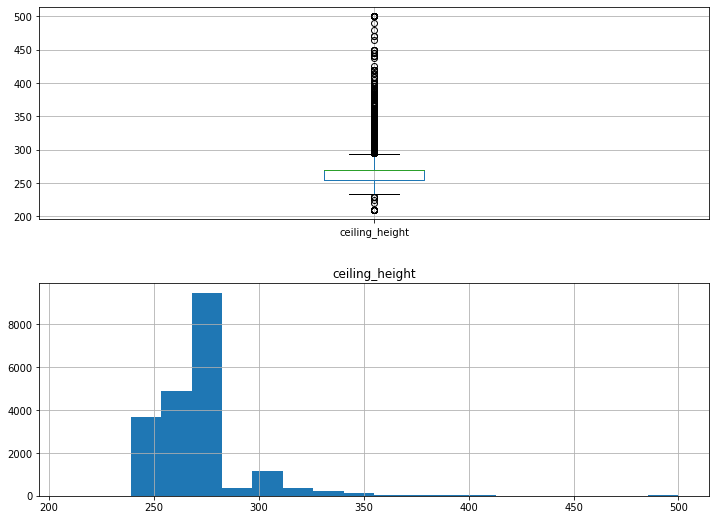

In [133]:
fig, ax = plt.subplots(2, facecolor='white', figsize=(12,9))

df.boxplot(column=['ceiling_height'], ax=ax[0])
df.hist(column=['ceiling_height'], bins=20, ax=ax[1])

count    20518.000000
mean         2.024564
std          1.054808
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


array([<AxesSubplot:title={'center':'rooms'}>], dtype=object)

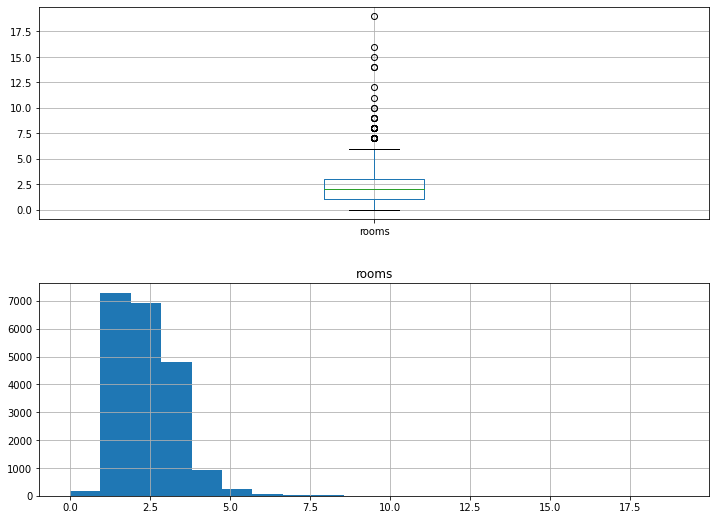

In [134]:
fig, ax = plt.subplots(2, facecolor='white', figsize=(12,9))

print(df['rooms'].describe())
df.boxplot(column=['rooms'], ax=ax[0])
df.hist(column=['rooms'], bins=20, ax=ax[1])

In [135]:
print(df.query('rooms == 0')['rooms'].count())
print(df.query('rooms == 0')['total_area'].median())
print(df.query('rooms == 0')['living_area'].median())


183
270.0
180.0


In [136]:
print(df.query('rooms == 0')[['total_area', 'kitchen_area', 'living_area']].describe())
print(df.query('rooms != 0')[['total_area', 'kitchen_area', 'living_area']].describe())

        total_area  kitchen_area  living_area
count   183.000000    183.000000   183.000000
mean    306.202186     55.306011   194.863388
std     272.773258     50.978279   148.269720
min     155.000000     29.000000    20.000000
25%     244.000000     45.000000   160.000000
50%     270.000000     49.000000   180.000000
75%     300.000000     53.500000   197.000000
max    3710.000000    707.000000  1984.000000
         total_area  kitchen_area   living_area
count  20335.000000  20335.000000  20335.000000
mean     592.595771    104.766954    335.746103
std      341.263554     58.433874    212.734489
min      130.000000     20.000000     20.000000
25%      400.000000     70.000000    186.000000
50%      510.000000     91.000000    299.000000
75%      680.000000    120.000000    411.000000
max     9000.000000   1120.000000   4097.000000


count    20518.000000
mean       590.041427
std        341.770586
min        130.000000
25%        397.000000
50%        510.000000
75%        680.000000
max       9000.000000
Name: total_area, dtype: float64


array([<AxesSubplot:title={'center':'total_area'}>], dtype=object)

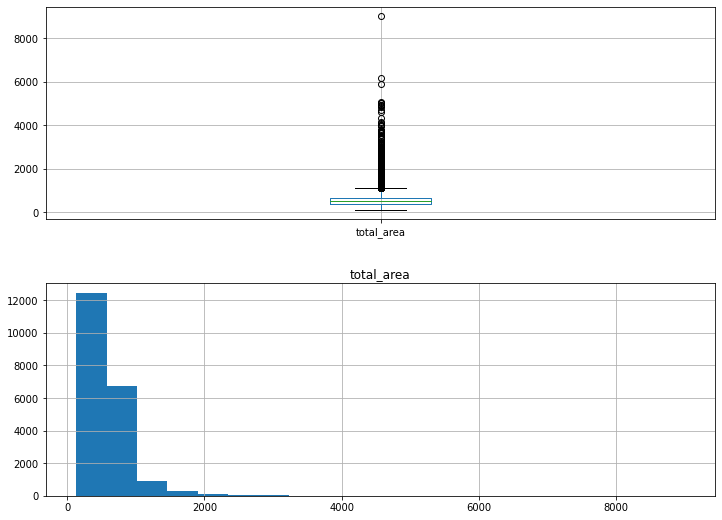

In [137]:
fig, ax = plt.subplots(2, facecolor='white', figsize=(12,9))

print(df['total_area'].describe())
df.boxplot(column=['total_area'], ax=ax[0])
df.hist(column=['total_area'], bins=20, ax=ax[1])

count    20518.000000
mean       334.489570
std        212.656463
min         20.000000
25%        186.000000
50%        297.500000
75%        410.000000
max       4097.000000
Name: living_area, dtype: float64


array([<AxesSubplot:title={'center':'living_area'}>], dtype=object)

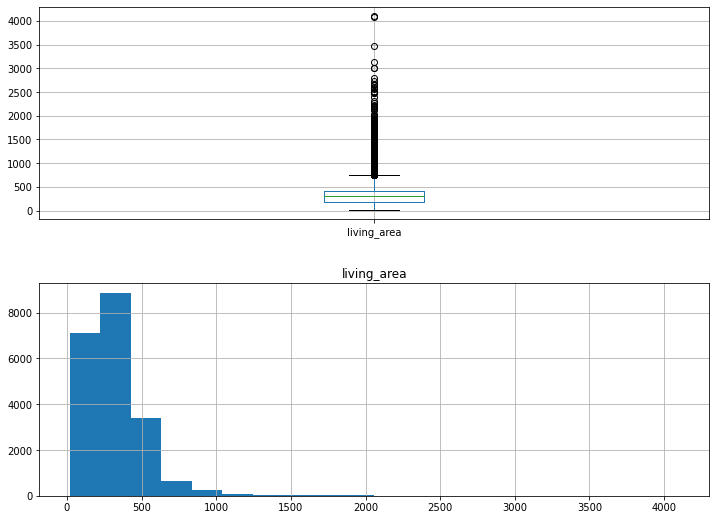

In [138]:
fig, ax = plt.subplots(2, facecolor='white', figsize=(12,9))

print(df['living_area'].describe())
df.boxplot(column=['living_area'], ax=ax[0])
df.hist(column=['living_area'], bins=20, ax=ax[1])

count    20518.000000
mean       104.325811
std         58.555451
min         20.000000
25%         70.000000
50%         90.000000
75%        119.750000
max       1120.000000
Name: kitchen_area, dtype: float64


array([<AxesSubplot:title={'center':'kitchen_area'}>], dtype=object)

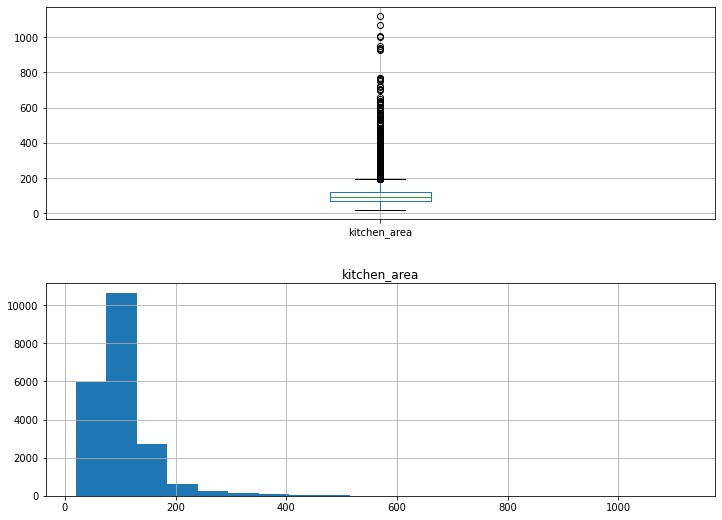

In [139]:
fig, ax = plt.subplots(2, facecolor='white', figsize=(12,9))

print(df['kitchen_area'].describe())
df.boxplot(column=['kitchen_area'], ax=ax[0])
df.hist(column=['kitchen_area'], bins=20, ax=ax[1])

<AxesSubplot:xlabel='total_area', ylabel='living_area'>

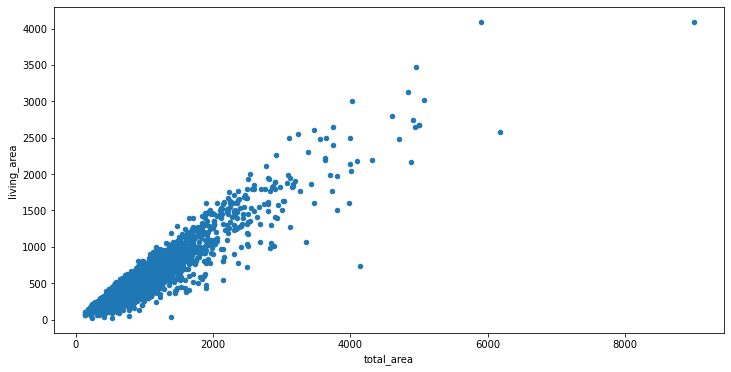

In [140]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.plot.scatter(x='total_area' , y='living_area', ax=ax )

<AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>

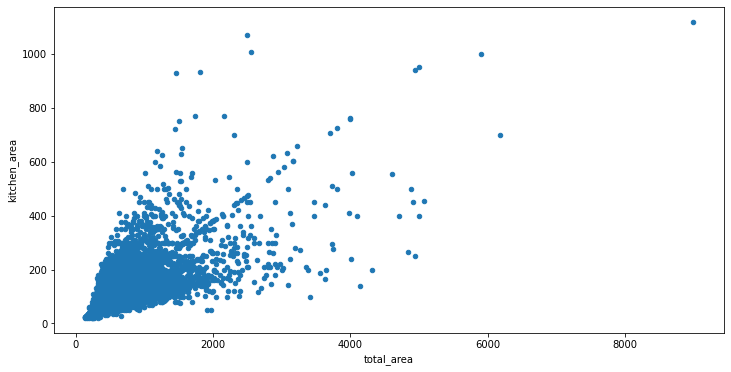

In [141]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.plot.scatter(x='total_area', y='kitchen_area', ax=ax)

<AxesSubplot:xlabel='total_area', ylabel='price_per_sq'>

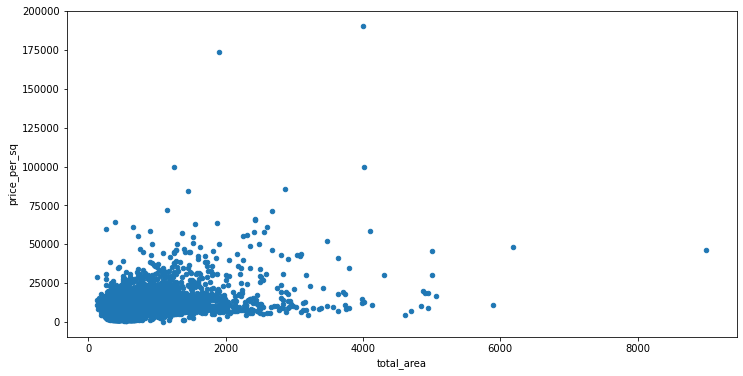

In [142]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.plot.scatter(x='total_area', y='price_per_sq', ax=ax)

### Task 1

Study the time of sale of the apartment. Plot a histogram. Calculate the mean and median. Describe how long a sale usually takes. When can sales be considered very fast, and when unusually long?

<AxesSubplot:>

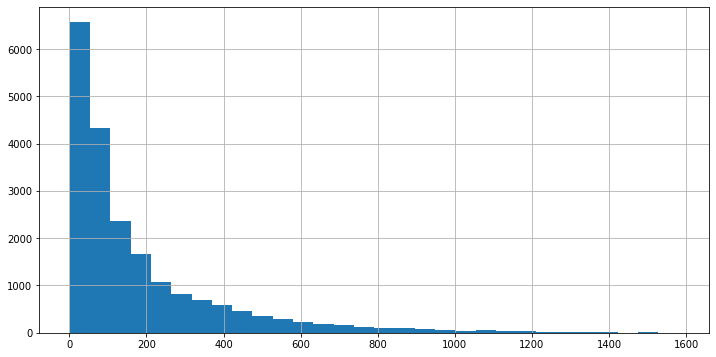

In [143]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df['days_exposition'].hist(bins=30, ax=ax)

In [144]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [145]:
print(iqr(df['days_exposition']))

(45.0, 232.0, 187.0)


In [146]:
199+154*1.5

430.0

<AxesSubplot:>

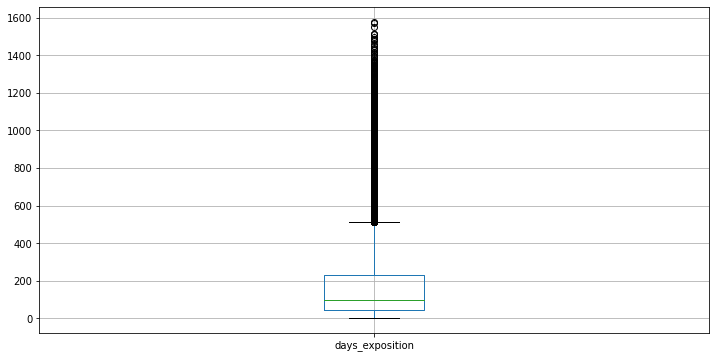

In [147]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.boxplot(column=['days_exposition'], ax=ax)

In [148]:
print(df['days_exposition'].corr(df['price_per_sq']))
print(df['days_exposition'].corr(df['last_price']))

0.0488172192606001
0.08114593098611303


<b>Conclusion</b>

1. Graphs were built
2. Average exposition time is 169 days but median 95 - there are relatively many apartments that have very expositions
3. The fast exposition time is less than 45 days, more than 199 days of exposition can be qualified as long, super long expostitions - 430+ days

### Task 2

Remove rare and outliers. Describe what features you found

In [149]:
pd.set_option('display.max_columns', None)
df.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,other_area,price_per_sq,month,year,kitchen_share,living_share
count,20518.000000,2.051800e+04,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000,20518.000000
mean,9.610976,6.266173e+06,590.041427,2.024564,270.080368,10.867287,334.489570,5.987133,104.325811,1.050444,220918.909738,208784.148114,0.464421,66370.583049,0.588459,61725.973828,180.888634,150.879033,9782.249391,6.585242,2017.214982,18.871799,55.874509
std,5.659554,1.086298e+07,341.770586,1.054808,22.789417,6.653292,212.656463,4.943915,58.555451,0.940207,386133.283725,392037.872975,0.745264,47069.857011,0.879407,48401.191732,219.727988,117.927936,4762.198038,3.486362,0.967743,6.805318,9.889242
min,0.000000,1.219000e+04,130.000000,0.000000,210.000000,1.000000,20.000000,1.000000,20.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.000000,11.000000,1.000000,2014.000000,2.538071,2.158273
25%,6.000000,3.400000e+06,397.000000,1.000000,254.000000,5.000000,186.000000,2.000000,70.000000,0.000000,20965.000000,11001.000000,0.000000,606.250000,0.000000,637.000000,45.000000,92.000000,7619.000000,3.000000,2017.000000,13.898514,50.000000
50%,9.000000,4.500000e+06,510.000000,2.000000,270.000000,9.000000,297.500000,4.000000,90.000000,1.000000,33481.000000,14977.500000,0.000000,99999.000000,0.000000,99999.000000,95.000000,125.000000,9378.500000,7.000000,2017.000000,18.461538,55.374593
75%,14.000000,6.500000e+06,680.000000,3.000000,270.000000,16.000000,410.000000,8.000000,119.750000,2.000000,51553.000000,30582.000000,1.000000,99999.000000,1.000000,99999.000000,232.000000,174.000000,11195.000000,10.000000,2018.000000,22.560593,62.723814
max,50.000000,7.630000e+08,9000.000000,19.000000,500.000000,60.000000,4097.000000,33.000000,1120.000000,5.000000,999999.000000,999999.000000,3.000000,99999.000000,3.000000,99999.000000,1580.000000,3783.000000,190750.000000,12.000000,2019.000000,72.463768,90.517241


In [150]:
df.query('rooms == 0').head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_imp,other_area,price_per_sq,month,year,day,check_floor,kitchen_share,living_share
268,8,2480000,412,2018-03-12,0,270,17,247,4,False,True,False,51,2,Санкт-Петербург,38171,15015,0,99999,2,982,64,Санкт-Петербург,113,6019,3,2018,Monday,other,12.378641,59.951456
763,12,3240000,290,2018-10-30,0,270,24,170,2,False,True,False,55,2,Санкт-Петербург,35129,16293,0,99999,1,475,13,Санкт-Петербург,64,11172,10,2018,Tuesday,other,18.965517,58.620690
764,3,3900000,320,2016-10-18,0,270,24,180,2,False,True,False,61,2,Санкт-Петербург,44754,8409,1,609,0,99999,540,Санкт-Петербург,79,12187,10,2016,Tuesday,other,19.062500,56.250000
797,5,3300000,270,2017-11-10,0,280,17,200,16,False,True,False,51,2,Санкт-Петербург,12507,12419,0,99999,1,528,113,Санкт-Петербург,18,12222,11,2017,Friday,other,18.888889,74.074074
839,10,3150000,260,2017-07-14,0,275,21,173,11,False,True,False,49,2,Санкт-Петербург,48847,16685,0,99999,0,99999,622,Санкт-Петербург,36,12115,7,2017,Friday,other,18.846154,66.538462
1060,11,2550000,300,2017-11-10,0,275,23,159,11,False,True,False,57,2,Санкт-Петербург,21928,17256,0,99999,1,429,19,Санкт-Петербург,83,8500,11,2017,Friday,other,19.000000,53.000000
1481,19,3550000,275,2017-12-06,0,275,18,180,12,False,True,False,52,2,Санкт-Петербург,34201,14069,0,99999,0,99999,226,Санкт-Петербург,42,12909,12,2017,Wednesday,other,18.909091,65.454545
1636,5,3500000,271,2018-02-01,0,270,18,187,9,False,False,True,51,2,Санкт-Петербург,32036,8175,0,99999,1,644,70,Санкт-Петербург,32,12915,2,2018,Thursday,other,18.819188,69.003690
1656,4,3170000,284,2018-07-26,0,270,23,204,2,False,True,False,54,2,Санкт-Петербург,21460,16788,0,99999,1,170,28,Санкт-Петербург,25,11161,7,2018,Thursday,other,19.014085,71.830986
1761,4,3670000,264,2018-07-26,0,260,21,190,4,False,True,False,50,1,Санкт-Петербург,36579,9092,0,99999,1,454,28,Санкт-Петербург,24,13901,7,2018,Thursday,other,18.939394,71.969697


In [151]:
df.query('rooms == 0')['studio'].value_counts()

True     124
False     59
Name: studio, dtype: int64

In [152]:
df.sort_values(by='price_per_sq').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_imp,other_area,price_per_sq,month,year,day,check_floor,kitchen_share,living_share
5819,7,12190,1090,2019-03-20,2,275,25,320,25,False,False,False,405,2,Санкт-Петербург,36421,9176,1,805,0,99999,8,Санкт-Петербург,365,11,3,2019,Wednesday,last,37.155963,29.357798
23620,5,430000,540,2018-06-26,2,270,3,288,3,False,False,False,102,1,посёлок станции Свирь,999999,999999,0,99999,0,99999,44,Свирь,148,796,6,2018,Tuesday,last,18.888889,53.333333
20966,9,500000,520,2018-08-02,2,270,2,310,1,False,False,False,80,0,Сланцы,999999,999999,0,99999,0,99999,110,Сланцы,130,961,8,2018,Thursday,first,15.384615,59.615385
20997,17,550000,540,2019-02-07,2,300,2,400,1,False,False,False,75,0,Сланцы,999999,999999,0,99999,0,99999,78,Сланцы,65,1018,2,2019,Thursday,first,13.888889,74.074074
23462,7,450000,434,2018-08-31,2,270,5,303,3,False,False,False,55,1,деревня Старополье,999999,999999,0,99999,0,99999,96,Старополье,75,1036,8,2018,Friday,other,12.672811,69.815668
18951,3,1450000,1380,2018-07-06,3,254,2,580,2,False,False,False,120,0,Гатчина,999999,999999,0,99999,0,99999,52,Гатчина,680,1050,7,2018,Friday,last,8.695652,42.028986
21060,11,470000,445,2018-07-02,2,250,2,280,2,False,False,False,75,1,Сланцы,999999,999999,0,99999,0,99999,298,Сланцы,90,1056,7,2018,Monday,last,16.853933,62.921348
23425,7,450000,420,2017-07-31,2,261,1,230,1,False,False,False,58,0,городской посёлок Будогощь,999999,999999,0,99999,0,99999,233,Будогощь,132,1071,7,2017,Monday,first/last,13.809524,54.761905
21034,13,560000,520,2017-11-21,2,300,3,300,3,False,False,False,60,1,Сланцы,999999,999999,0,99999,0,99999,207,Сланцы,160,1076,11,2017,Tuesday,last,11.538462,57.692308
18767,4,850000,780,2017-05-04,3,254,9,125,7,False,False,False,85,0,Гатчина,999999,999999,0,99999,0,99999,169,Гатчина,570,1089,5,2017,Thursday,other,10.897436,16.025641


In [153]:
x = iqr(df['total_area'])
df_original = df
df = df.query('total_area > (@x[0] - 1.5 * @x[2]) and total_area < (@x[1] + 3 * @x[2])')
df = df.query('rooms != 0 and studio == False')
df = df.query('price_per_sq > 100')

In [154]:
df.describe()
x

(397.0, 680.0, 283.0)

<b>Output</b>

1. Outliers in ceilings were dealt with at the pre-processing stage
2. Questions were caused by an unnecessarily large number of rooms + area (presented in meters * 10).
When processing the area, the excessive number of rooms also went away
3. Strange number of rooms = 0, Removed from the database (although it could have been replaced by 1)
4. There is one appartment with very low price per sq m - excluded from the df

### Task 3

* What factors most affect the value of an apartment? Find out if the price depends on the square meter, number of rooms, floor (first or last), distance from the center. 
* Study the dependence on the date of placement: day of the week, month and year. 
* Choose the 10 locations with the most listings. Calculate the average price per square meter in those locations.
* Highlight the locations with the highest and lowest housing costs

In [155]:
x = pd.DataFrame()
x['corr_lastprice'] = df.corrwith(df['last_price'])
x['corr_pricepersq'] = df.corrwith(df['price_per_sq'])
x

,corr_lastprice,corr_pricepersq
total_images,0.134159,0.124122
last_price,1.000000,0.772094
total_area,0.689765,0.184570
rooms,0.402191,-0.052706
ceiling_height,0.348990,0.294862
floors_total,0.065904,0.203191
living_area,0.569231,0.078061
floor,0.059838,0.160214
is_apartment,0.037010,0.049871
studio,NaN,NaN


<AxesSubplot:xlabel='city_centers_nearest', ylabel='price_per_sq'>

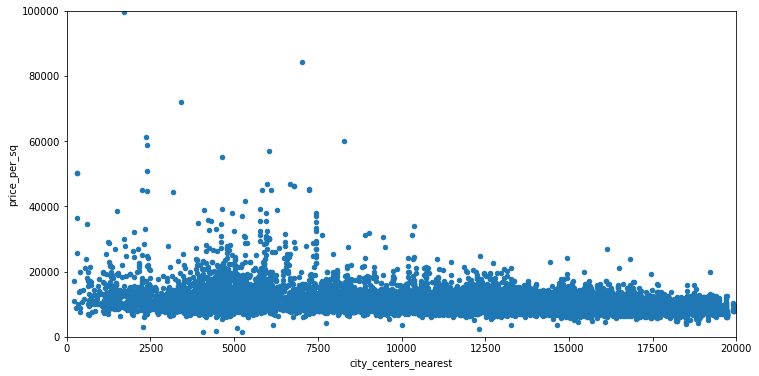

In [156]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.plot(y='price_per_sq', x='city_centers_nearest', kind='scatter', xlim=(0, 20000), ylim=(0, 100000), ax=ax)

<AxesSubplot:xlabel='city_centers_nearest', ylabel='price_per_sq'>

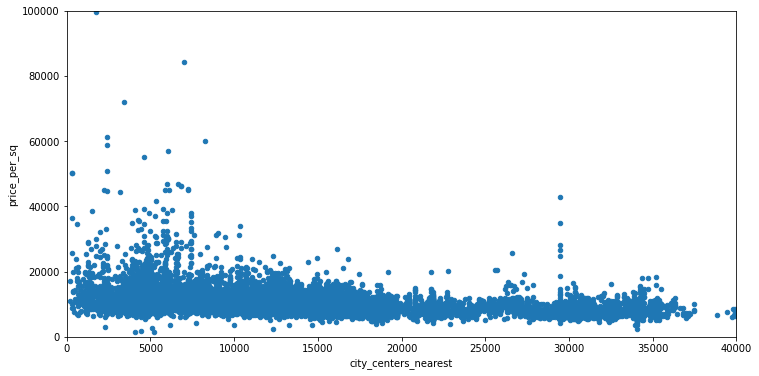

In [157]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

df.plot(y='price_per_sq', x='city_centers_nearest', kind='scatter', xlim=(0, 40000), ylim=(0, 100000), ax=ax)

<AxesSubplot:title={'center':'price_per_sq'}, xlabel='rooms'>

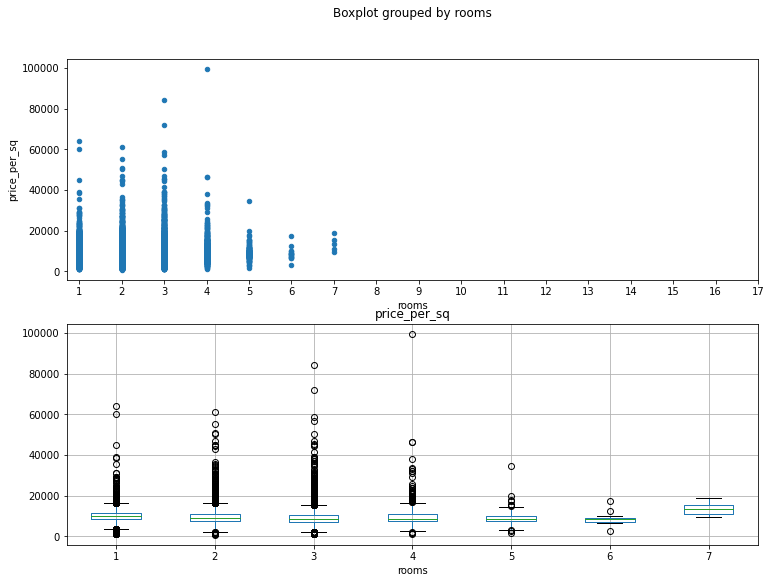

In [158]:
fig, ax = plt.subplots(2,facecolor='white', figsize=(12,9))

df.plot(y='price_per_sq', x='rooms', kind='scatter', xticks=range(1,18), ax=ax[0])
df.boxplot('price_per_sq', by='rooms', ax=ax[1])

In [159]:
x = []
for room in df['rooms'].unique():
    x.append((room, df.query('rooms == @room')['price_per_sq'].median(), \
              df.query('rooms == @room')['price_per_sq'].count()))
x.sort(key=lambda x: x[0])
x

[(1, 9971.0, 7259),
 (2, 9152.5, 6908),
 (3, 8747.0, 4761),
 (4, 8749.5, 832),
 (5, 8672.0, 146),
 (6, 8351.0, 16),
 (7, 13409.0, 5)]

In [160]:
x = []
for room in df['check_floor'].unique():
    x.append((room, df.query('check_floor == @room')['price_per_sq'].median(), \
              df.query('check_floor == @room')['price_per_sq'].count()))
x.sort(key=lambda x: x[0])
x

[('first', 8000.0, 2410),
 ('first/last', 4109.0, 20),
 ('last', 8668.0, 2703),
 ('other', 9671.5, 14794)]

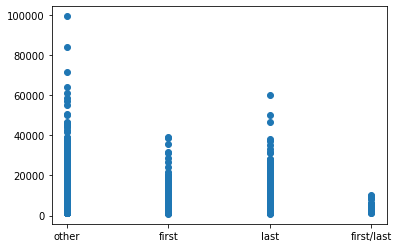

In [170]:
plt.scatter(df['check_floor'], df['price_per_sq'])


<AxesSubplot:title={'center':'price_per_sq'}, xlabel='check_floor'>

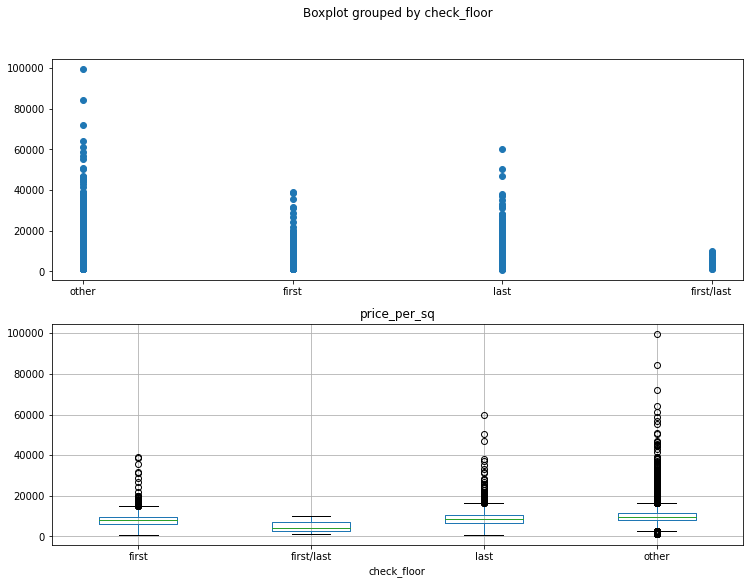

In [174]:
fig, ax = plt.subplots(2, facecolor='white', figsize=(12,9))

ax[0].scatter(df['check_floor'], df['price_per_sq'])
df.boxplot('price_per_sq', by='check_floor', ax=ax[1])

In [175]:
x = []
for room in df['year'].unique():
    x.append((room, df.query('year == @room')['price_per_sq'].median(), \
              df.query('year == @room')['price_per_sq'].count()))
x.sort(key=lambda x: x[0])
x

[(2014, 10264.0, 109),
 (2015, 9184.0, 1069),
 (2016, 9111.0, 2635),
 (2017, 9166.0, 7650),
 (2018, 9500.0, 7403),
 (2019, 10304.0, 1061)]

In [176]:
x = []
for room in df['month'].unique():
    x.append((room, df.query('month == @room')['price_per_sq'].median(), \
              df.query('month == @room')['price_per_sq'].count()))
x.sort(key=lambda x: x[0])
x

[(1, 9432.0, 1261),
 (2, 9347.0, 2217),
 (3, 9302.0, 1929),
 (4, 9235.0, 1486),
 (5, 9185.0, 1112),
 (6, 9211.0, 1646),
 (7, 9333.0, 1523),
 (8, 9517.0, 1567),
 (9, 9522.0, 1793),
 (10, 9354.0, 1888),
 (11, 9402.5, 2078),
 (12, 9191.0, 1427)]

In [177]:
x = []
for room in df['day'].unique():
    x.append((room, df.query('day == @room')['price_per_sq'].median(), \
              df.query('day == @room')['price_per_sq'].count()))
x.sort(key=lambda x: x[0])
x

[('Friday', 9312.0, 3427),
 ('Monday', 9333.0, 2972),
 ('Saturday', 9242.5, 1624),
 ('Sunday', 9285.0, 1439),
 ('Thursday', 9387.0, 3637),
 ('Tuesday', 9375.0, 3523),
 ('Wednesday', 9415.0, 3305)]

<AxesSubplot:xlabel='locality_name_imp'>

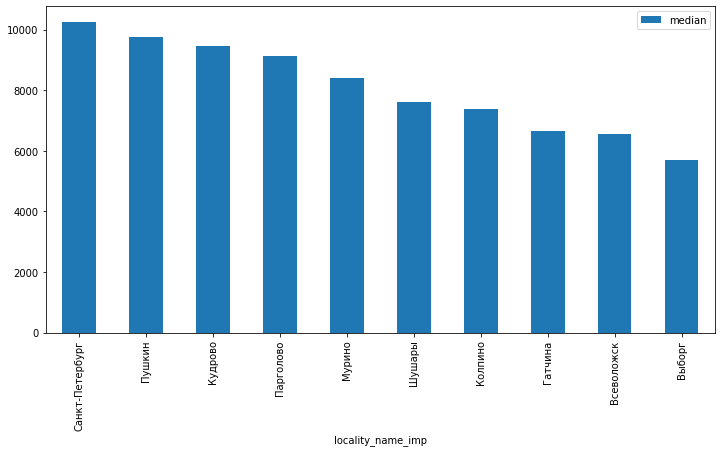

In [178]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,6))

x = df['locality_name_imp'].value_counts()
x = x.nlargest(10)
x = x.index.tolist()
x = df.query('locality_name_imp in @x')
x = x.pivot_table(values='price_per_sq', index='locality_name_imp', \
                 aggfunc = ['median', 'mean', 'count'])

x.columns = ('median', 'mean', 'count')
x.sort_values('median', ascending=False)
x.sort_values('median', ascending=False).plot(y='median', kind='bar', ax=ax)

<b>Conclusions</b>

<i> What factors most influence the price of an apartment? </i>

Significant impact on:

* Total area and all other types of areas (to a much lesser extent on prices per sq. m.)

* Ceiling height

* Distance from the airport and the center (especially for the price per sq. m.)

* Availability of parks and lake (and distance to them)

* The number of rooms (positive to the total cost (since the area is growing), but negative to the square meters (which is also logical)

All indicators in general have the expected sign in the correlation

<i> Find out if the price depends on the square meter, number of rooms, floor (first or last), distance from the center. </i>

There is a strong dependence of the overall area, the distance from the center affects negatively (although there are observations that don't follow this logic (maybe they are close to something else that drives the price up?)

The floor affects - the cheapest 1st floor in a one-story building, then the 1st floor in a multistory building, than the last one and others. Among the last floors there are exceptions, where the price is very high (mb. luxury houses / penthouse?)

<i> Also explore the dependence on the posting date: day of the week, month, and year.</i>

* Dependence on the year - a fall in prices in 2014-2016, a gradual recovery after the crisis up to 2019.

* Dependence on the month - a drop in activity in May with a slight decrease in price

* Minor differences between different days of the week, activity drop in weekends 

<i>Choose the 10 locations with the most listings. Calculate the average price per square meter in those locations. Highlight the locations with the highest and lowest housing costs.</i >


* Cities identified - maximum price in St. Petersburg, minimum - in Vyborg


### Task 4

Select apartments in St. Petersburg. Your task is to find out which area is included in the center. Create a column with the distance to the center in kilometers: round to whole numbers. After that, calculate the average price for each kilometer. Build a graph: it should show how the price depends on the distance from the center. Define the border where the graph changes a lot - this will be the central zone.

In [179]:
spb = df.query('locality_name_imp == "Санкт-Петербург"').copy(deep=True)

In [180]:
spb['center_km'] = spb['city_centers_nearest'] / 1000

In [181]:
spb['center_km'] = spb['center_km'].astype('int64' , copy=False)

In [195]:
x = spb.pivot_table(values=['last_price', 'price_per_sq'], index=['center_km'], aggfunc=['mean', 'median', 'count'])
print(x)

                   mean                   median                   count  \
             last_price  price_per_sq last_price price_per_sq last_price   
center_km                                                                  
0          1.326191e+07  15322.327586  9500000.0      12800.5         58   
1          1.144792e+07  13899.476471  9300000.0      11782.0        170   
2          1.054890e+07  13042.597285  8550000.0      11173.0        221   
3          9.297226e+06  11726.984576  7800000.0      10460.0        389   
4          1.036881e+07  13398.603198  8811000.0      12524.0        688   
5          1.048585e+07  13672.772887  8100000.0      12249.0        568   
6          9.977068e+06  13787.950000  7200000.0      12427.5        360   
7          9.701836e+06  13503.377246  6999000.0      12242.5        334   
8          7.560555e+06  11782.559353  6200000.0      11009.0        556   
9          6.034601e+06  10826.147841  4900000.0      10368.5        602   
10         6

In [196]:
x.columns=('mean_price', 'mean_per_sq', 'median_price', 'median_per_sq', 'count_price', 'count_per_sq')
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean_price     30 non-null     float64
 1   mean_per_sq    30 non-null     float64
 2   median_price   30 non-null     float64
 3   median_per_sq  30 non-null     float64
 4   count_price    30 non-null     int64  
 5   count_per_sq   30 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 1.6 KB


<AxesSubplot:xlabel='center_km'>

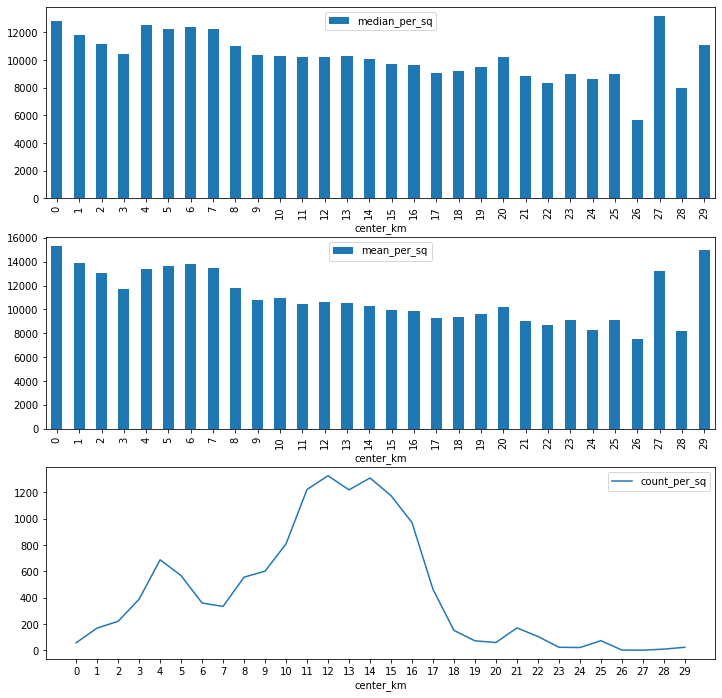

In [199]:
fig, ax = plt.subplots(3, facecolor='white', figsize=(12,12))

x.plot(kind='bar', y='median_per_sq',ax=ax[0])
x.plot(kind='bar', y='mean_per_sq',ax=ax[1])
x.plot(kind='line', y='count_per_sq', xticks=range(0, 30), ax=ax[2])

<b>Conclusions</b>

The city center can be outlined within a radius of about 3 km from it, after which there is a drop in prices and a sharp increase in supply



### Task 5

Select  apartments in the center. Analyze this territory and study the following parameters: area, price, number of rooms, ceiling height. Also highlight the factors that affect the cost of the apartment (number of rooms, floor, distance from the center, date of placement of the ad). Draw conclusions. Do they differ from the general findings throughout the city?

In [185]:
spb['center'] = spb['center_km'].apply(lambda x: 1 if x <= 3 else 0)

In [186]:
x = spb.pivot_table(values=['total_area', 'living_area', 'kitchen_area', \
                            'last_price', 'rooms', 'ceiling_height', \
                           'price_per_sq', 'other_area'], columns='center', \
                    aggfunc=('median'))
x = x.T
x[['kitchen_area', 'living_area', 'other_area', 'total_area']] = \
x[['kitchen_area', 'living_area', 'other_area', 'total_area']] / 10
x = x.T
x

center,0,1
ceiling_height,270.0,296.0
kitchen_area,9.3,11.0
last_price,5100000.0,8500000.0
living_area,30.0,46.0
other_area,12.6,17.6
price_per_sq,10222.0,11092.0
rooms,2.0,3.0
total_area,51.3,78.0


In [187]:
x = spb.pivot_table(values='total_area', columns='center', index=['year'], aggfunc=('count'))
x['centr_share'] = x[1] / (x[0]+x[1]) *100
x

center,0,1,centr_share
year,,,
2014,70,6,7.894737
2015,659,89,11.898396
2016,1625,126,7.195888
2017,4794,340,6.622517
2018,4431,244,5.219251
2019,745,33,4.241645


In [188]:
x = pd.DataFrame()
x['corr_lastprice'] = spb.corrwith(spb['last_price'])
x['corr_pricepersq'] = spb.corrwith(spb['price_per_sq'])
y = spb.query('center == 1')
x['corr_lastprice_center'] = y.corrwith(y['last_price'])
x['corr_pricepersq_center'] = y.corrwith(y['price_per_sq'])

x

,corr_lastprice,corr_pricepersq,corr_lastprice_center,corr_pricepersq_center
total_images,0.118697,0.111155,0.128386,0.090963
last_price,1.000000,0.763981,1.000000,0.836551
total_area,0.707777,0.170811,0.477305,-0.006095
rooms,0.414530,-0.086789,0.216782,-0.160156
ceiling_height,0.321420,0.236367,0.078666,0.064285
floors_total,-0.020692,0.058623,0.116570,0.117189
living_area,0.582735,0.052705,0.389136,-0.052636
floor,0.007585,0.071174,0.106539,0.063017
is_apartment,0.033645,0.064848,0.145622,0.172505
studio,NaN,NaN,NaN,NaN


In [189]:
x = []
for room in spb['year'].unique():
    x.append((room, spb.query('year == @room')['price_per_sq'].median(), \
              spb.query('year == @room')['price_per_sq'].count()))
x.sort(key=lambda x: x[0])
x

[(2014, 11605.5, 76),
 (2015, 10000.0, 748),
 (2016, 10000.0, 1751),
 (2017, 10034.0, 5134),
 (2018, 10476.0, 4675),
 (2019, 11131.5, 778)]

In [190]:
x1 = []
for room in y['year'].unique():
    x1.append((room, y.query('year == @room')['price_per_sq'].median(), \
              y.query('year == @room')['price_per_sq'].count()))
x1.sort(key=lambda x: x[0])
x1

[(2014, 20768.5, 6),
 (2015, 9941.0, 89),
 (2016, 10413.0, 126),
 (2017, 11056.5, 340),
 (2018, 11625.5, 244),
 (2019, 12372.0, 33)]

In [191]:
for line in range(0, 6):
    print(x[line][0], int(x1[line][1] / x[line][1] * 100), x1[line][1] , x[line][1])

2014 178 20768.5 11605.5
2015 99 9941.0 10000.0
2016 104 10413.0 10000.0
2017 110 11056.5 10034.0
2018 110 11625.5 10476.0
2019 111 12372.0 11131.5


In [192]:
x = spb.pivot_table(values=['total_area', 'living_area', 'kitchen_area', \
                            'last_price', 'rooms', 'ceiling_height', \
                           'price_per_sq', 'other_area', 'floor', 'parks_around3000', 'ponds_around3000'], columns='center', \
                    aggfunc=('median'))
x = x.T
x[['kitchen_area', 'living_area', 'other_area', 'total_area']] = \
x[['kitchen_area', 'living_area', 'other_area', 'total_area']] / 10
x = x.T
x

center,0,1
ceiling_height,270.0,296.0
floor,5.0,3.0
kitchen_area,9.3,11.0
last_price,5100000.0,8500000.0
living_area,30.0,46.0
other_area,12.6,17.6
parks_around3000,0.0,1.0
ponds_around3000,0.0,2.0
price_per_sq,10222.0,11092.0
rooms,2.0,3.0


<b>Conclusions</b>

* Apartments in the center differ in all aspects
* They are larger, more expensive, with higher ceilings (by 26 cm)
* Higher number of rooms. But almost the same size kitchen
* Apartments in the center are more than 1.66 times more expensive, have higher flows and a larger area.

Pricing is very different between the center and other territory of St. Petersburg
* The price per square practically does not depend on the area of the apartment - most likely because even small ones will have a very high price for it
* The height of the ceilings has little effect. The reason is that in cnter ceiling height is universally higher compared to the rest of the city. So when we analyze the whole city ceiling height becomes an indicator that distinguish the center and the rest of the city
* Proximity to the airport becomes unimportant, which is understandable - everything is within a radius of 3 km, that is, + - to the airport is the same
* Proximity to amenities is less important - since there is a lot of things nearby, the contrast between those who are closer and those who are farther away is lost 9 we can say that everything is fast
* Similarly with proximity to the center. When we check the whole city it becomes important. For the center since everything is close to it it stops being important

## Conclusion

* All tasks were completed.
* Data processing is done, all the missing variables were filled
* Columns required to complete the task have been added
* Tasks completed, results are shown at the end of each block